In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# Factors influence US Housing Price:

# Business Problem

# Description

## Description

The housing market in the United States has seen significant fluctuations over the past two decades. These fluctuations are influenced by a variety of factors, both on the supply and demand side. Understanding these factors is crucial for predicting future trends and making informed decisions in the real estate market.

The goal of this study is to build a data science model that uses these factors to explain how they have impacted home prices over the last 20 years. The S&P Case-Shiller Housing Price Index (HPI) will be used as an indicator of changes in home prices1. This model could provide valuable insights for homeowners, investors, and policymakers.

# Real World / Business Objectives and Constraints

1.Accurately predict the factors influencing housing prices to provide reliable and actionable insights for customers.

2.No strict latency constraint, but timely updates on housing market trends are appreciated.

3.The cost of errors could lead to misinformed investment decisions, resulting in financial loss and a negative customer experience.

# Machine Learning problem

## Mapping the real-world problem to a Machine Learning Problem

The problem at hand can be classified as a supervised regression problem, and here's why:

**Supervised Learning:** The target variable in this scenario is the S&P Case-Shiller Housing Price Index, which we aim to predict or estimate. This prediction is based on a set of predictor variables such as Building Permits, Construction Spending, Housing Starts, Homes Sold, Mortgage Rates, USA GDP, Unemployment, and Delinquency Rate on Mortgages. Supervised learning is suitable when there is a clear target variable and known inputs are used to predict that target.

**Regression:** The S&P Case-Shiller Housing Price Index, our target variable, is a continuous variable. It can take on any value within a range, making this a regression problem. Regression models are employed when the output or dependent variable is a real or continuous value, like the price index in this case.

In terms of mapping this to a machine learning problem, the supply and demand datasets would serve as input features (X variables), and the S&P Case-Shiller Housing Price Index would be output or target variable (Y variable). The objective of our machine learning model would be to learn a function that maps input features to output variable. This function can then be utilized to predict the housing price index based on new input data.

The motivation behind this problem is to construct a data science model that can pinpoint the factors that have had the most impact on home prices over the past 20 years. This could involve conducting a feature importance analysis after building the regression model to determine which features are most influential in predicting housing prices.

# Performance metric

Performance Metrics for Housing Price Prediction:

Mean Absolute Error (MAE): This is the mean of the absolute value of errors. It measures the average magnitude of errors in a set of predictions, without considering their direction.

Mean Squared Error (MSE): This is the mean of the squared errors. It emphasizes larger errors over smaller ones.
Root Mean Squared Error (RMSE): This is the square root of the mean of the squared errors. Like MSE, it also emphasizes larger errors.

R-Squared: Also known as the coefficient of determination, it measures how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

Adjusted R-Squared: This adjusts the R-Squared statistic based on the number of predictors in the model. It increases only if a new predictor improves the model more than would be expected by chance.

F-Statistic: It assesses the significance of all predictors simultaneously. It compares a model with no predictors to the specified model.

# Machine Learning Objectives and Constraints

In machine learning, the objective is to create a model that can make accurate predictions. This involves minimizing the error metrics and maximizing the accuracy metrics. Here's we will achieve this:

Minimize Error Metrics: The goal is to minimize the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). These metrics measure the difference between the predicted and actual values. A lower value indicates a better fit of the model to the data.

Maximize Accuracy Metrics: The goal is to maximize R-Squared and Adjusted R-Squared. These metrics measure how well the model explains the variation in the data. A higher value indicates a better fit of the model to the data.

Improve F-Statistic: The F-Statistic assesses the significance of all predictors simultaneously. A higher F-Statistic indicates that the predictors significantly improve the model.

Feature Selection: Selecting the right features for our model can also help improve these metrics. Irrelevant or redundant features can decrease the performance of the model.

Model Selection: Different models have different assumptions and may perform better or worse depending on the specific dataset.

Trying out different models and selecting the one with the best performance can help improve these metrics.

Hyperparameter Tuning: Most models have hyperparameters that can be tuned to improve performance. This involves finding the optimal values for these hyperparameters that minimize error and maximize accuracy.

# About Our data

1. **Annual Average Expenditure (55-64)**: This dataset contains information about the annual average expenditure for the age group 55-64.

2. **Average Expenditure (25-34)**: This dataset contains information about the average expenditure for the age group 25-34.

3. **Average Annual Expenditure (45-54)**: This dataset contains information about the average annual expenditure for the age group 45-54.

4. **Consumer Price Index**: This dataset contains information about the consumer price index over time.

5. **Employees in Construction**: This dataset contains information about the number of employees in the construction sector over time.

6. **Gross Domestic Product (GDP)**: This dataset contains information about the GDP over time.

7. **Housing Credit Availability Index (HCAI)**: These datasets contain information about the HCAI for government loans, GSE loans, and private portfolio loans.

8. **Homeownership Rate**: This dataset contains information about the homeownership rate over time.

9. **Houses for Sale to Houses Sold**: This dataset contains information about the ratio of houses for sale to houses sold over time.

10. **Job Gains in Private Sector**: This dataset contains information about job gains in the private sector over time.

11. **Mortgage Rate**: This dataset contains information about mortgage rates over time.

12. **New Privately Owned Housing Units Under Construction**: This dataset contains information about the number of new privately owned housing units under construction over time.

13. **Permits Granted Monthly**: This dataset contains information about the number of permits granted each month.

14. **Personal Saving Rate**: This dataset contains information about the personal saving rate over time.

15. **Population Quarterly**: This dataset contains quarterly population data.

16. **Privately Owned Housing Units Completed**: This dataset contains information about the number of privately owned housing units completed each month.

17. **Retail Sales Home Furnishing Stores**: This dataset contains information about retail sales in home furnishing stores over time.

18. **Unemployment Rate**: This dataset contains information about the unemployment rate over time.

19. **Unemployment Rate in Construction**: This dataset contains information about the unemployment rate in the construction sector over time.

20. **Wages and Salaries**: This dataset contains information about wages and salaries over time.

21. **Industrial Production Cement**: This dataset contains information about industrial production of cement over time.

22. **Producer Price Index Concrete Brick**: This dataset contains information about the producer price index for concrete and brick over time.

23. **Target Variable**: Housing Price index
   
Each of these datasets has been cleaned and processed to have a consistent format with a common datetime index, which will make further analysis and modeling much easier.

# About our Pre-Processing Data

**Annual Average Expenditure (55-64)**: The data in ‘annual average expenditure 55-64.csv’ is read into a pandas DataFrame. The ‘Year’ column is converted to datetime format and set as the index. The annual_monthly function is used to interpolate the annual data to monthly data. The DataFrame is then saved to a new CSV file.

**Average Expenditure (25-34)**: Similar steps are taken for the ‘average expenditure 25-34.csv’ file.

**Average Annual Expenditure (45-54)**: For the ‘average_annual_expenditure_45-54.csv’ file, the ‘DATE’ column is converted to datetime format and set as the index. The annual_monthly function is used to interpolate the annual data to monthly data.

**Consumer Price Index**: The ‘consumer_price_index.csv’ file is read into a pandas DataFrame, and the ‘DATE’ column is converted to datetime format and set as the index.

**Employees in Construction**: The ‘employees_construction.csv’ file is processed similarly, with the ‘DATE’ column converted to datetime format and set as the index.

**Gross Domestic Product (GDP)**: For the ‘GDP.csv’ file, the quaterly_monthly function is used to interpolate quarterly GDP data to monthly data.

**Housing Credit Availability Index (HCAI)**: For the ‘HCAI_GOVT.csv’, ‘HCAI_GSE.csv’, and ‘HCAI_PP.csv’ files, the quaterly_monthly function is used to interpolate quarterly HCAI data to monthly data.

**Homeownership Rate**: For the ‘homeownershiprate.csv’ file, the quaterly_monthly function is used to interpolate quarterly homeownership rate data to monthly data.

**Houses for Sale to Houses Sold**: The ‘houses_for_sale_to_houses_sold.csv’ file is read into a pandas DataFrame, and the ‘DATE’ column is converted to datetime format and set as the index.

**Job Gains in Private Sector**: For the ‘job gains private.csv’ file, a custom function quaterly_monthly_changed is used to interpolate quarterly job gains data to monthly data.

**Mortgage Rate**: The ‘MORTGAGE30US.csv’ file is read into a pandas DataFrame, and the ‘DATE’ column is converted to datetime format and set as the index.

**New Privately Owned Housing Units Under Construction**: The ‘new_privately_owned_housing_units_completed.csv’ file is processed similarly, with the ‘DATE’ column converted to datetime format and set as the index.

**Permits Granted Monthly**: The ‘Permits_Granted_Monthly.csv’ file is read into a pandas DataFrame, and the ‘DATE’ column is converted to datetime format and set as the index.

**Personal Saving Rate**: The ‘personal saving rate.csv’ file is processed similarly, with the ‘DATE’ column converted to datetime format and set as the index.

**Population Quarterly**: For the ‘Population_Quarterly.csv’ file, the quaterly_monthly function is used to interpolate quarterly population data to monthly data.

**Privately Owned Housing Units Completed**: The ‘privately_owned_housing_units_completed.csv’ file is read into a pandas DataFrame, and the ‘DATE’ column is converted to datetime format and set as the index.

**Retail Sales Home Furnishing Stores**: The ‘retail_sales_home_furnishing_stores.csv’ file is processed similarly, with the ‘DATE’ column converted to datetime format and set as the index.

**Unemployment Rate**: The ‘Unemployment rate.csv’ file is processed similarly, with the ‘DATE’ column converted to datetime format and set as the index.

**Unemployment Rate in Construction**: The ‘unemployment_rate_construction.csv’ file is processed similarly, with the ‘DATE’ column converted to datetime format and set as the index.

**Wages and Salaries**: For the ‘wages and salaries.csv’ file, the quaterly_monthly function is used to interpolate quarterly wages and salaries data to monthly data.

**Industrial Production Cement**: The ‘Industrial_production_cement.csv’ file is read into a pandas DataFrame, and the ‘DATE’ column is converted to datetime format and set as the index.

**Producer Price Index Concrete Brick**: The ‘producer_price_index_concrete_brick.csv’ file is processed similarly, with the ‘DATE’ column converted to datetime format and set as the index.

**Target Variable**: For your target variable in your model (‘target.csv’), you’ve also read it into a pandas DataFrame, converted its ‘DATE’ column to datetime format, and set it as the index.

# Sources

In [2]:
#Checking if we have files in our system
files = os.listdir("../data_Cleaned_HPI")
len(files)
files

['average expenditure 25-34.csv',
 'average expenditure 35-44.csv',
 'average_annual_expenditure_45-54.csv',
 'avg-expenditure-55-64.csv',
 'consumer_price_index.csv',
 'employees_construction.csv',
 'GDP.csv',
 'HCAI_GOVT.csv',
 'HCAI_GSE.csv',
 'HCAI_PP.csv',
 'home-ownership-rate.csv',
 'houses_for_sale_to_houses_sold.csv',
 'industrial_production_cement.csv',
 'job_gains_private.csv',
 'MORTGAGE30US.csv',
 'new_privately_owned_housing_under_construction.csv',
 'nonresidential_const_val.csv',
 'Permits_Granted_Monthly.csv',
 'personal saving rate.csv',
 'Population.csv',
 'privately_owned_housing_units_completed.csv',
 'producer_price_index_concrete_brick.csv',
 'residential_construction_val.csv',
 'retail_sales_home_furnishing_stores.csv',
 'target.csv',
 'Unemployment rate.csv',
 'unrate_construction.csv']

In [3]:
# Double y axis plot
def plot_line(df,col1,col2,lag1 = 0,lag2= 0):
    
    col1_val = df[col1].shift(lag1)
    col2_val = df[col2].shift(lag2)

    fig,ax = plt.subplots()
    
    ax.plot(df.index, col1_val, color="blue", marker=".")
    
    ax.set_xlabel("year",fontsize=14)
    
    ax.set_ylabel(col1,color="blue",fontsize=14)

    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(df.index, col2_val,color="red",marker=".")
    ax2.set_ylabel(col2,color="red",fontsize=14)
    plt.show()
    
    print(np.corrcoef(col1_val.dropna(),col2_val.dropna()))

In [4]:
# index
monthly_rng = pd.date_range("01-2001","1-2021", freq = "M")
monthly_rng

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', length=240, freq='M')

In [5]:
df_dict = {}

for filename in files:
    tdf = pd.read_csv(os.path.join("../data_Cleaned_HPI", filename))
    df_dict.update({tdf.iloc[:,1].name : list(tdf.iloc[:,1])})
    
final_df = pd.DataFrame(df_dict,monthly_rng)

#final_df.to_csv("./data_Cleaned_HPI/final_df.csv")GDP.csv

In [6]:
final_df.rename(columns ={"0":"private_job_gains"},inplace=True)
df = final_df.copy()
df = df[:"2015"]
df["gdp_per_capita"] = df["GDP"]/df["population"]

In [7]:
df.corr()

,avg_expenditure_25_34,avg_expenditure_35_44,avg_expenditure_45_54,avg_expenditure_55_64,CPI,employees_construction,GDP,HCAI_GOVT,HCAI_GSE,HCAI_PP,...,personal_saving_rate,population,house_units_completed,producer_price_index_concrete_brick,residential_const_val,retail_sales_home_furnishing_stores,target,UNRATE,unrate_construction,gdp_per_capita
avg_expenditure_25_34,1.000000,0.983354,0.973711,0.984479,-0.107668,-0.317665,0.952762,-0.790514,-0.559341,-0.752091,...,0.372560,0.933571,-0.650173,0.939673,-0.269678,0.104997,0.625049,0.308999,0.219969,0.961125
avg_expenditure_35_44,0.983354,1.000000,0.981350,0.973879,-0.114017,-0.246568,0.938442,-0.758974,-0.517089,-0.729627,...,0.321769,0.910183,-0.600279,0.921954,-0.219257,0.159092,0.668978,0.239996,0.172775,0.947955
avg_expenditure_45_54,0.973711,0.981350,1.000000,0.975075,-0.141566,-0.325187,0.963686,-0.814481,-0.593582,-0.761067,...,0.422436,0.943799,-0.632345,0.930963,-0.242935,0.119018,0.611540,0.269972,0.177581,0.967187
avg_expenditure_55_64,0.984479,0.973879,0.975075,1.000000,-0.115255,-0.349628,0.957653,-0.818489,-0.598444,-0.776111,...,0.391519,0.945344,-0.666056,0.949990,-0.285953,0.073192,0.608795,0.339044,0.235364,0.963584
CPI,-0.107668,-0.114017,-0.141566,-0.115255,1.000000,0.087648,-0.111063,0.123025,0.145867,0.119631,...,-0.164487,-0.124807,0.085375,-0.122264,0.098157,0.068915,0.011917,-0.059533,0.100415,-0.102896
employees_construction,-0.317665,-0.246568,-0.325187,-0.349628,0.087648,1.000000,-0.458099,0.796232,0.910144,0.727266,...,-0.767610,-0.579379,0.864734,-0.570863,0.850321,0.796551,0.441405,-0.873424,-0.697267,-0.414852
GDP,0.952762,0.938442,0.963686,0.957653,-0.111063,-0.458099,1.000000,-0.873797,-0.663629,-0.820948,...,0.513176,0.988058,-0.711062,0.950969,-0.316552,0.048127,0.515745,0.331420,0.196466,0.998465
HCAI_GOVT,-0.790514,-0.758974,-0.814481,-0.818489,0.123025,0.796232,-0.873797,1.000000,0.932369,0.922474,...,-0.703926,-0.933326,0.917325,-0.925116,0.666152,0.415025,-0.114472,-0.683054,-0.520159,-0.849903
HCAI_GSE,-0.559341,-0.517089,-0.593582,-0.598444,0.145867,0.910144,-0.663629,0.932369,1.000000,0.857535,...,-0.763114,-0.760101,0.918802,-0.760676,0.801145,0.663222,0.200154,-0.795128,-0.625052,-0.627309
HCAI_PP,-0.752091,-0.729627,-0.761067,-0.776111,0.119631,0.727266,-0.820948,0.922474,0.857535,1.000000,...,-0.690076,-0.869804,0.943241,-0.908763,0.761120,0.434242,-0.022752,-0.580771,-0.443510,-0.797713


In [8]:
demodf = df.copy()
demodf = demodf[["population","avg_expenditure_25_34","avg_expenditure_35_44","avg_expenditure_55_64","avg_expenditure_45_54","target"]]
demodf

,population,avg_expenditure_25_34,avg_expenditure_35_44,avg_expenditure_55_64,avg_expenditure_45_54,target
2001-01-31,284169.00,38987.0,45296.0,39517.0,46308.0,109.845
2001-02-28,284392.00,39029.0,45443.0,39694.0,46456.0,110.499
2001-03-31,284615.00,39071.0,45590.0,39871.0,46604.0,111.107
2001-04-30,284838.00,39113.0,45737.0,40048.0,46752.0,111.650
2001-05-31,285086.67,39155.0,45884.0,40225.0,46900.0,112.162
...,...,...,...,...,...,...
2015-08-31,321413.67,51227.0,64392.0,57947.0,68387.0,172.954
2015-09-30,321622.34,51437.0,64627.0,58157.0,68729.0,173.848
2015-10-31,321831.00,51647.0,64862.0,58367.0,69071.0,174.811
2015-11-30,322005.33,51857.0,65097.0,58577.0,69413.0,175.755


In [9]:
from IPython.display import display, HTML

html_text = """
<div style="display: flex; justify-content: space-around;">
    <div>
        <h1>Demographic</h1>
        <ul>
            <li>population</li>
        </ul>
        
        <h2>Income-age distribution</h2>
        <ul>
            <li>average expenditure 25-34</li>
            <li>average expenditure 35-44</li>
            <li>average expenditure 45-54</li>
            <li>avg-expenditure-55-64</li>
        </ul>

        <h1>Mortgages</h1>
        <ul>
            <li>HCAI_GOVT</li>
            <li>HCAI_GSE</li>
            <li>HCAI_PP</li>
            <li>MORTGAGE30US</li>
        </ul>

        <h1>Health of the economy</h1>
        <ul>
            <li>GDP</li>
            <li>CPI</li>
            <li>private_job_gains</li>
            <li>personal_saving_rate</li>
            <li>UNRATE - Unemployment rate</li>
            <li>unrate_construction - Unemployment rate in construction industry</li>
        </ul>

        <!-- Add more headings and subheadings here -->
    </div>

    <div>
        <h1>Construction Industry</h1>
        <ul>
            <li>employees_construction</li>
            <li>industrial_production_cement</li>
            <li>pvt_owned_house_under_const</li>
            <li>residential_const_val</li>
            <li>producer_price_index_concrete_brick</li>
        </ul>

        <h1>Housing industry</h1>
        <ul>
            <li>houses-for-sale-to-sold - Number of houses for sale vs number of houses got sold</li>
            <li>home-ownership-rate</li>
            <li>house_units_completed - Number of new house units completed in a given month</li>
            <li>retail_sales_home_furnishing_stores - Sales of home furnishing stores</li>
        </ul>

        <!-- Add more headings and subheadings here -->
    </div>

    <!-- Add more divs for more columns -->
    <!-- Infrastructure and permits -->
    <!-- nonresidential_const_val -->
    <!-- permits -->

    <!-- DEMOGRAPHICS FACTORS -->
    
    <!-- Add more divs for more columns -->
    
    <!-- Infrastructure and permits -->
    <!-- nonresidential_const_val -->
    <!-- permits -->

    <!-- DEMOGRAPHICS FACTORS -->
    
    <!-- Add more divs for more columns -->
    
    <!-- Infrastructure and permits -->
    <!-- nonresidential_const_val -->
    <!-- permits -->

    <!-- DEMOGRAPHICS FACTORS -->
    
    <!-- Add more divs for more columns -->
    
    <!-- Infrastructure and permits -->
    <!-- nonresidential_const_val -->
    <!-- permits -->

    <!-- DEMOGRAPHICS FACTORS -->

<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
<div style="display: flex; justify-content: space-around;">
"""

display(HTML(html_text))


# Starting with Demographic Factors

In [10]:

demodf

,population,avg_expenditure_25_34,avg_expenditure_35_44,avg_expenditure_55_64,avg_expenditure_45_54,target
2001-01-31,284169.00,38987.0,45296.0,39517.0,46308.0,109.845
2001-02-28,284392.00,39029.0,45443.0,39694.0,46456.0,110.499
2001-03-31,284615.00,39071.0,45590.0,39871.0,46604.0,111.107
2001-04-30,284838.00,39113.0,45737.0,40048.0,46752.0,111.650
2001-05-31,285086.67,39155.0,45884.0,40225.0,46900.0,112.162
...,...,...,...,...,...,...
2015-08-31,321413.67,51227.0,64392.0,57947.0,68387.0,172.954
2015-09-30,321622.34,51437.0,64627.0,58157.0,68729.0,173.848
2015-10-31,321831.00,51647.0,64862.0,58367.0,69071.0,174.811
2015-11-30,322005.33,51857.0,65097.0,58577.0,69413.0,175.755


Observation:
    
The dataset consists of six columns: population, avg_expenditure_25_34, avg_expenditure_35_44, avg_expenditure_55_64, avg_expenditure_45_54, and target.
    
The target column represents the Housing Price Index (HPI).

The columns avg_expenditure_25_34, avg_expenditure_35_44, avg_expenditure_45_54, and avg_expenditure_55_64 likely represent the average expenditure for different age groups.

The population column represent the total population for each observation in the dataset.
    

# Visualizing Our Data for Better Understanding and Patterns



Checking the distibution of our data in demograpic factors

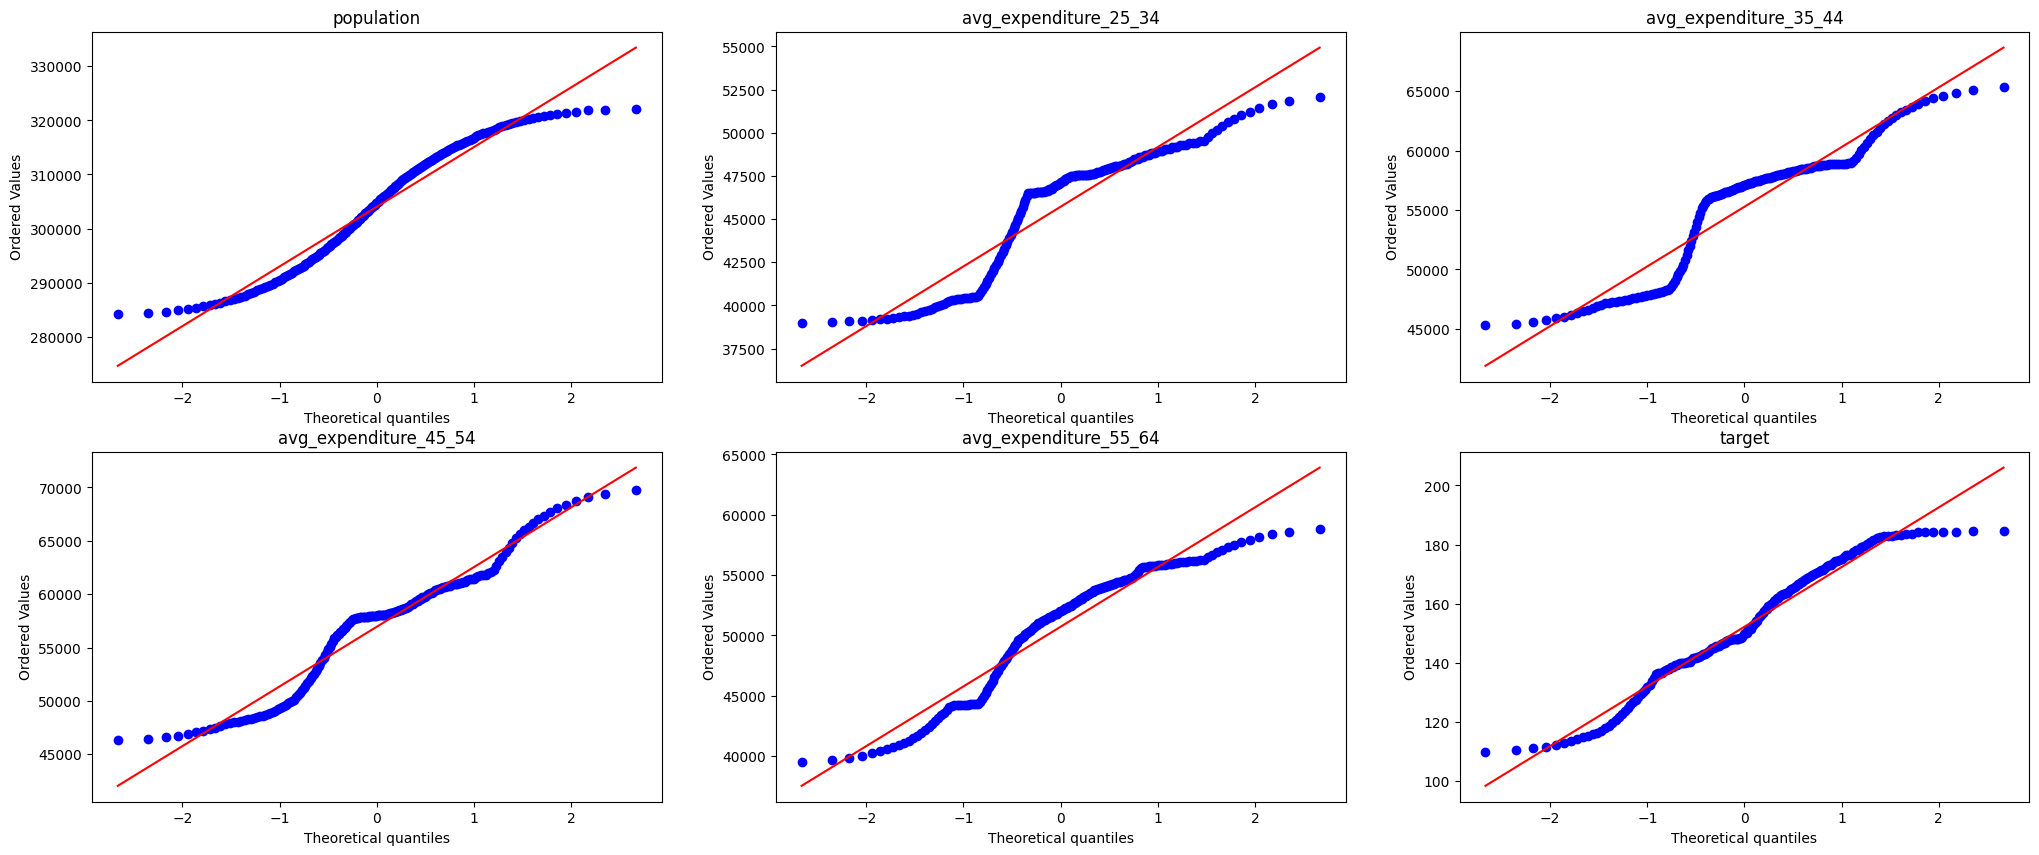

In [11]:
# Creating gg plot check for our distibution
import matplotlib.pyplot as plt
import scipy.stats as stats

figure, axis = plt.subplots(2, 3, figsize=(25,10))

stats.probplot(demodf['population'], plot=axis[0, 0])
axis[0, 0].set_title("population")

stats.probplot(demodf['avg_expenditure_25_34'], plot=axis[0, 1])
axis[0, 1].set_title("avg_expenditure_25_34")

stats.probplot(demodf['avg_expenditure_35_44'], plot=axis[0, 2])
axis[0, 2].set_title("avg_expenditure_35_44")

stats.probplot(demodf['avg_expenditure_45_54'], plot=axis[1, 0])
axis[1, 0].set_title("avg_expenditure_45_54")

stats.probplot(demodf['avg_expenditure_55_64'], plot=axis[1, 1])
axis[1, 1].set_title("avg_expenditure_55_64")

stats.probplot(demodf['target'], plot=axis[1, 2])
axis[1, 2].set_title("target")

plt.show()


Observation:

Upon visual inspection of the Q-Q plots for our dataset, it is evident that the data points do not align along the 45-degree reference line. This suggests that our data  is not be normally distributed.

Additionally, we observe a deviation of the data points from the reference line in the tails of the distribution. This could indicate skewness or the presence of outliers in our data. The specific pattern of deviation—whether the points lie above or below the reference line, and whether this occurs at the left tail, right tail, or both—can give us more information about the nature of our data's distribution.

These observations highlight the importance of further statistical analysis to confirm these initial findings and to guide any necessary data transformations for our subsequent analyses our data is indeed skewed, we might consider applying a log transformation to make it more normally distributed.outliers are present, we might consider robust statistical methods that are less sensitive to extreme values. 

these are preliminary observations based on visual inspection of Q-Q plots, and definitive conclusions will be drawn based on further statistical tests.

    

# Checking for outliers

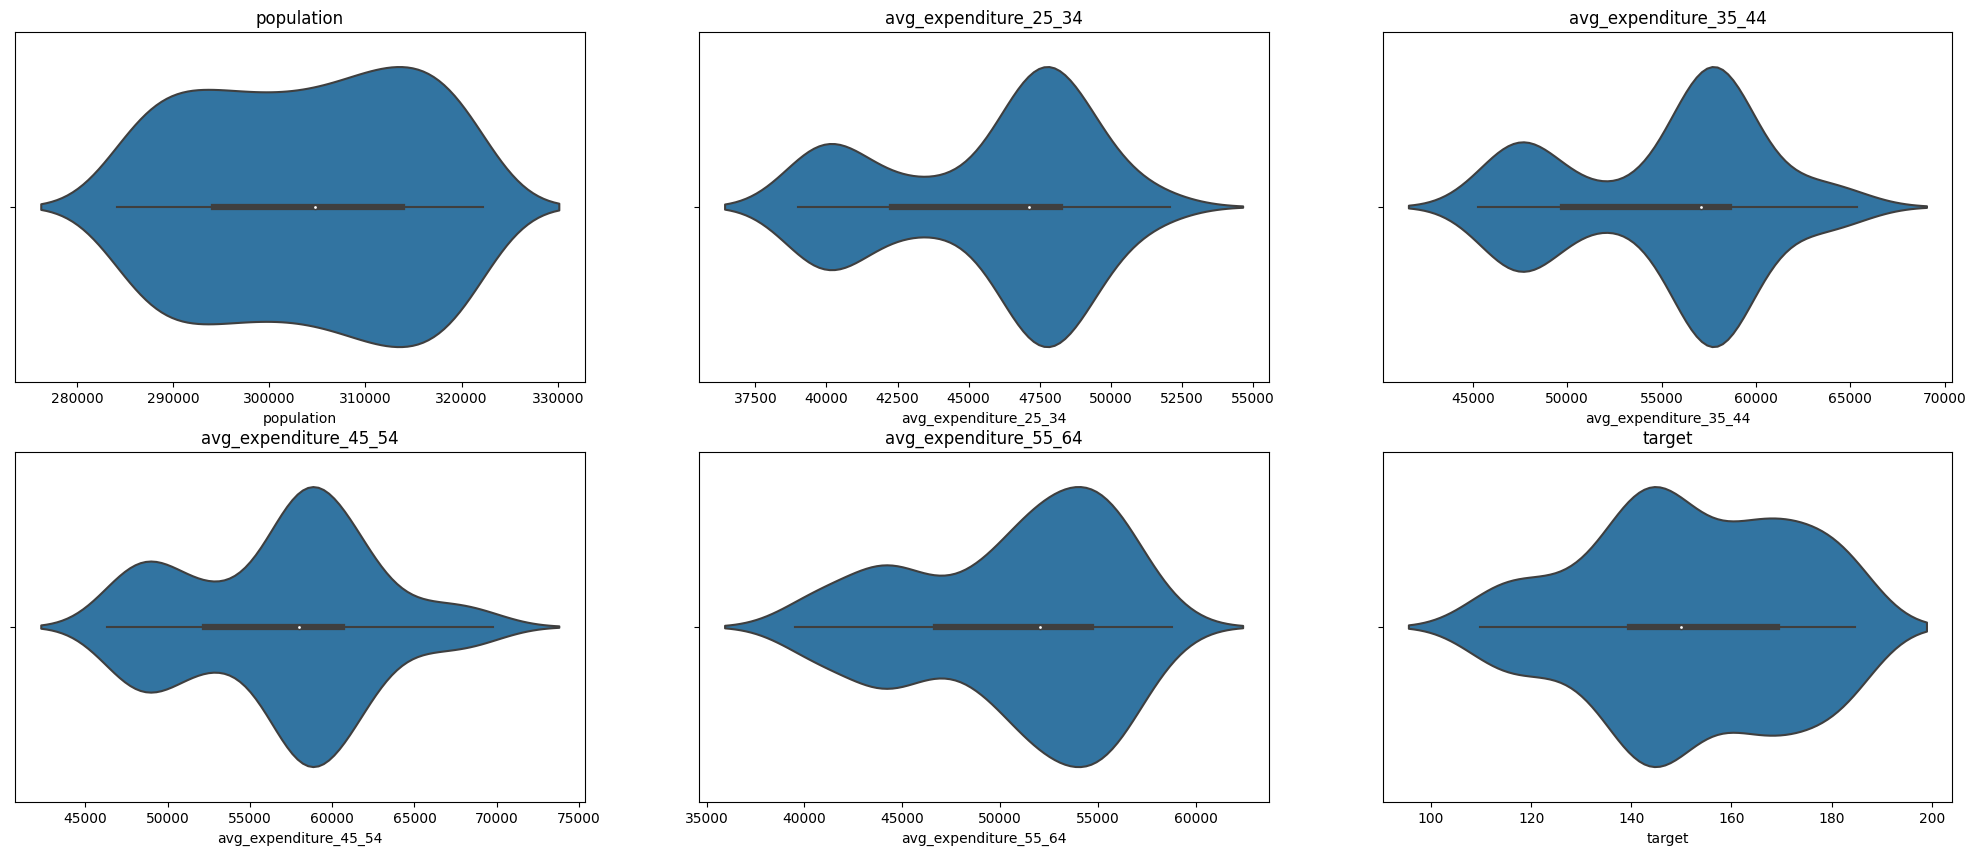

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.violinplot(x=demodf['population'], ax=axis[0, 0])
axis[0, 0].set_title("population")

sns.violinplot(x=demodf['avg_expenditure_25_34'], ax=axis[0, 1])
axis[0, 1].set_title("avg_expenditure_25_34")

sns.violinplot(x=demodf['avg_expenditure_35_44'], ax=axis[0, 2])
axis[0, 2].set_title("avg_expenditure_35_44")

sns.violinplot(x=demodf['avg_expenditure_45_54'], ax=axis[1, 0])
axis[1, 0].set_title("avg_expenditure_45_54")

sns.violinplot(x=demodf['avg_expenditure_55_64'], ax=axis[1, 1])
axis[1, 1].set_title("avg_expenditure_55_64")

sns.violinplot(x=demodf['target'], ax=axis[1, 2])
axis[1, 2].set_title("target")

plt.show()


observations:

The data is not normally distributed, as indicated by the asymmetrical shapes of the violin plots.

There is evidence of skewness in our data, with the distribution appearing more spread out on one side of the median.

The density of data points varies across the range of our variables, suggesting differing frequencies of values.


### We are creating a function named plot_line. This function is designed to generate a line plot of two variables from a given DataFrame. 
The plot will have two y-axes, allowing us to compare the trends of these two variables over time. 
This function is particularly useful when the two variables have different scales or units. 
By using this function, we can easily visualize and compare the behavior of these two variables in a single, 
easy-to-understand plot.

In [13]:


def plot_line(df, col1, col2, lag1=0, lag2=0):
    # Shift the columns if lag is specified
    col1_val = df[col1].shift(lag1)
    col2_val = df[col2].shift(lag2)

    # Create a new figure and axis
    fig, ax = plt.subplots()

    # Plot the first column on the first y-axis
    ax.plot(df.index, col1_val, color="blue", marker=".")
    ax.set_xlabel("year", fontsize=14)
    ax.set_ylabel(col1, color="blue", fontsize=14)

    # Create a second y-axis and plot the second column on it
    ax2 = ax.twinx()
    ax2.plot(df.index, col2_val, color="red", marker=".")
    ax2.set_ylabel(col2, color="red", fontsize=14)

    # Display the plot
    plt.show()

    # Print the correlation coefficient between the two columns
    print(np.corrcoef(col1_val.dropna(), col2_val.dropna()))


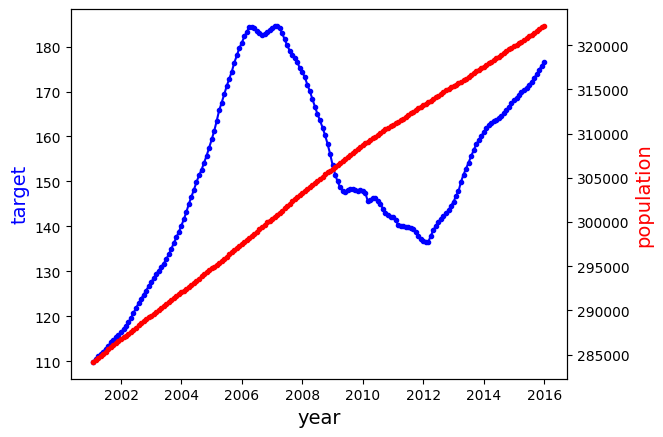

[[1.        0.4117042]
 [0.4117042 1.       ]]


In [14]:
plot_line(demodf,"target","population")

**observations:**

**Housing Price Index (HPI)**: The HPI shows a fluctuating trend over the years. It starts at 110 in 2000, rises to 185 in 2008, then drops to 135 by 2012, and again rises to 177 by 2016. This could indicate a volatile housing market during this period.

**Population**: The population steadily increases from 285,000 in 2000 to 340,000 in 2016. This could be due to a variety of factors such as economic growth, migration, etc.

**Supply and Demand**: he population data represents the population of house buyers and the HPI represents the price of houses (supply), we can infer that the demand for houses does not directly correlate with the price. For instance, despite an increase in population (potential demand), the HPI (price) fluctuates significantly.

**2008 Housing Bubble**: The peak in HPI in 2008 aligns with the historical context of the housing bubble around that time. Despite an increase in potential demand (population), the prices fell after 2008 which is characteristic of a market crash.

**Post-2008 Recovery**: The recovery of the HPI post-2008 despite a steady increase in population suggests that other factors such as economic recovery, government policies, and market confidence might have played a role.

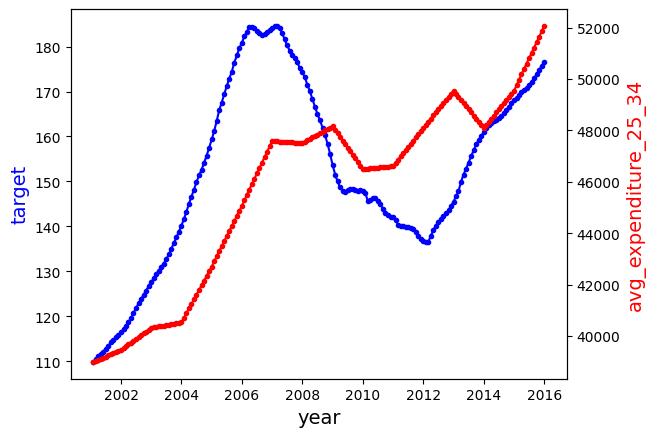

[[1.         0.62504918]
 [0.62504918 1.        ]]


In [15]:
plot_line(demodf,"target","avg_expenditure_25_34") 

**observations agr range 25-34:**

Housing Price Index (HPI): The HPI shows a fluctuating trend over the years. It starts at 110 in 2000, rises to 185 in 2008, then drops to 135 by 2012, and again rises to 177 by 2016. This could indicate a volatile housing market during this period.

Average Expenditure: The average expenditure shows a steady increase from 30,000 in 2000 to 52,000 in 2016. This could be due to a variety of factors such as inflation, economic growth, increase in income levels, etc.

Supply and Demand: average expenditure data represents the purchasing power of the population (demand) and the HPI represents the price of houses (supply), we can infer that the demand for houses does not directly correlate with the price. For instance, despite an increase in average expenditure (potential demand), the HPI (price) fluctuates significantly.

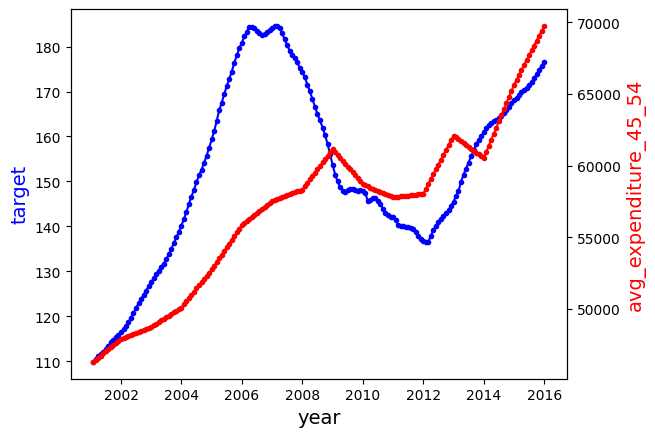

[[1.         0.61154038]
 [0.61154038 1.        ]]


In [16]:
plot_line(demodf,"target","avg_expenditure_45_54") 

**observations age range 45-54:**

Housing Price Index (HPI): The HPI shows a fluctuating trend over the years. It starts at 110 in 2000, rises to 185 in 2008, then drops to 135 by 2012, and again rises to 177 by 2016. This could indicate a volatile housing market during this period.

Average Expenditure: The average expenditure for the age group 45-54 shows a steady increase from $40,000 in 2000 to $68,000 in 2016. This could be due to a variety of factors such as inflation, economic growth, increase in income levels, etc.

Supply and Demand:  average expenditure data represents the purchasing power of the population (demand) and the HPI represents the price of houses (supply), we can infer that the demand for houses does not directly correlate with the price. For instance, despite an increase in average expenditure (potential demand), the HPI (price) fluctuates significantly.    

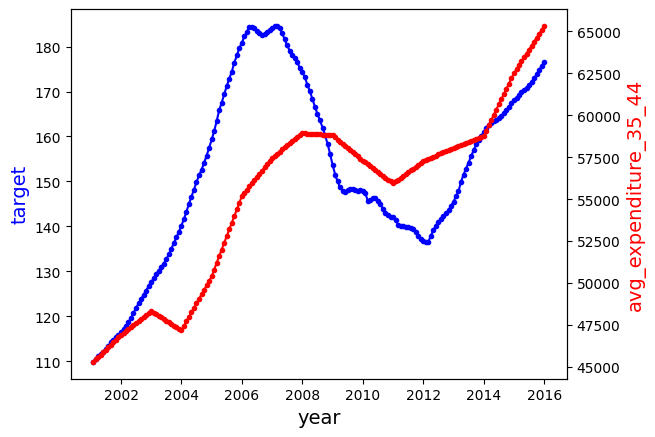

[[1.         0.66897841]
 [0.66897841 1.        ]]


In [17]:
plot_line(demodf,"target","avg_expenditure_35_44")

**observations: Age 35-44**

Housing Price Index (HPI): The HPI shows a fluctuating trend over the years. It starts at 110 in 2000, rises to 185 in 2008, then drops to 135 by 2012, and again rises to 177 by 2016. This could indicate a volatile housing market during this period.

Average Expenditure: The average expenditure for the age group 35-44 shows a steady increase from 45,000 in 2000 to 62,500 in 2016. This could be due to a variety of factors such as inflation, economic growth, increase in income levels, etc.

Supply and Demand: If we assume that the average expenditure data represents the purchasing power of the population (demand) and the HPI represents the price of houses (supply), we can infer that the demand for houses does not directly correlate with the price. For instance, despite an increase in average expenditure (potential demand), the HPI (price) fluctuates significantly.

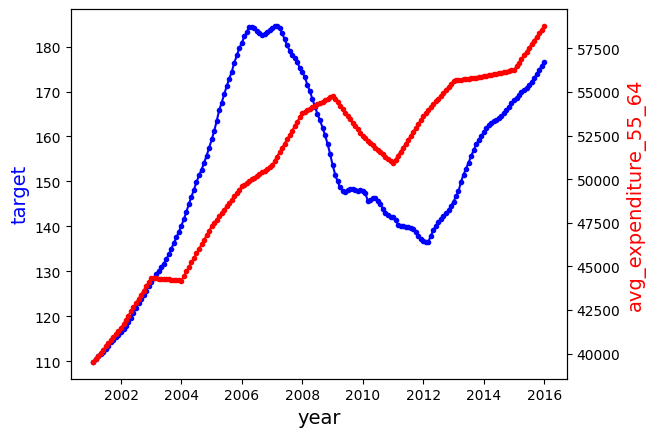

[[1.         0.60879469]
 [0.60879469 1.        ]]


In [18]:
plot_line(demodf,"target","avg_expenditure_55_64")


**observations for the age group 55-64:**

Housing Price Index (HPI): The HPI for this age group also shows a fluctuating trend over the years. It starts at 100 in 2000, rises to 150 in 2008, then drops to 150 by 2012, and again rises to 180 by 2016. This could indicate a volatile housing market during this period, similar to the trend observed for the age group 35-44.

Average Expenditure: The average expenditure for the age group 55-64 shows a steady increase from 35,000 in 2000 to 57,500 in 2016. This could be due to a variety of factors such as inflation, economic growth, increase in income levels, etc.

Supply and Demand: If we assume that the average expenditure data represents the purchasing power of the population (demand) and the HPI represents the price of houses (supply), we can infer that the demand for houses does not directly correlate with the price. For instance, despite an increase in average expenditure (potential demand), the HPI (price) fluctuates significantly. This trend is consistent with what was observed for the age group 35-44.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

<Axes: >

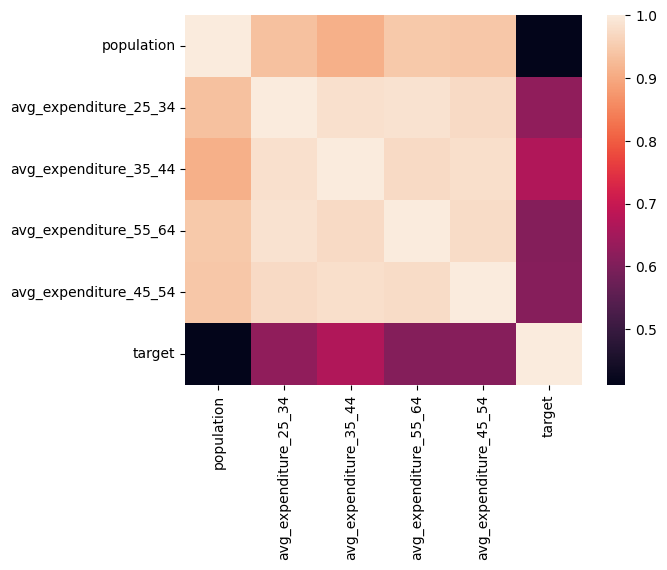

In [19]:
sns.heatmap(demodf.corr())

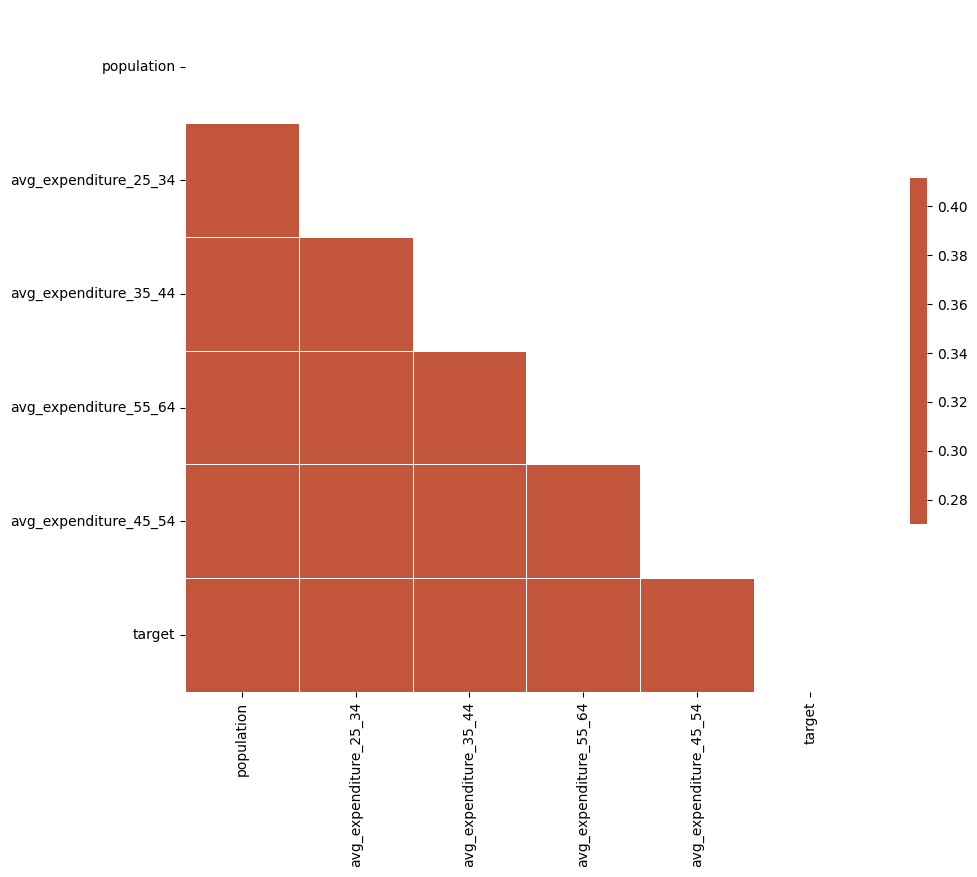

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = demodf.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm


# Assuming that 'demodf' is your DataFrame and it doesn't have any missing values

# Add a constant term to the DataFrame as statsmodels' VIF method requires this
X1 = sm.add_constant(demodf)

# Calculate and print VIF
vif = pd.DataFrame()
vif["variables"] = X1.columns
vif["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif)


               variables          VIF
0                  const  7097.444293
1             population    22.199926
2  avg_expenditure_25_34    55.908048
3  avg_expenditure_35_44    62.340220
4  avg_expenditure_55_64    44.758039
5  avg_expenditure_45_54    48.110398
6                 target     3.340785


 interpretation of your VIF results:

population: The VIF is 22.2, which suggests a high level of multicollinearity with the other predictor variables.

avg_expenditure_25_34: The VIF is 55.9, indicating a very high level of multicollinearity.

avg_expenditure_35_44: The VIF is 62.3, indicating a very high level of multicollinearity.

avg_expenditure_55_64: The VIF is 44.8, indicating a high level of multicollinearity.

avg_expenditure_45_54: The VIF is 48.1, indicating a high level of multicollinearity.
target: The VIF is 3.3, which suggests some correlation, but it’s not as high as the others.

The ‘const’ term typically has a high VIF in regression models as it represents the intercept term.

High VIFs (typically above 5) indicate that the associated predictor variables are highly correlated with each other, which can affect the stability and interpretability of regression model. we want to consider dropping these variables from model or using dimensionality reduction techniques before re-running our model. However.

# Analyzing Time-Dependent Correlations in Data Using Lagged Variables

In [22]:
# Creating 12-Month Lagged Variables and Removing Rows with Missing Values

lagged_cols = ['avg_expenditure_55_64', 'avg_expenditure_35_44', 'avg_expenditure_25_34', 'population']
lag_period = 12

for col in lagged_cols:
    demodf[f'{col}_lag{lag_period}'] = demodf[col].shift(lag_period)

# Drop rows with NaN values
demodf = demodf.dropna()


In [23]:
(demodf.corr())

,population,avg_expenditure_25_34,avg_expenditure_35_44,avg_expenditure_55_64,avg_expenditure_45_54,target,avg_expenditure_55_64_lag12,avg_expenditure_35_44_lag12,avg_expenditure_25_34_lag12,population_lag12
population,1.000000,0.916479,0.886858,0.935500,0.929426,0.237052,0.941846,0.897390,0.927154,0.999873
avg_expenditure_25_34,0.916479,1.000000,0.978719,0.982598,0.966449,0.502215,0.938263,0.940010,0.949772,0.911341
avg_expenditure_35_44,0.886858,0.978719,1.000000,0.969284,0.976150,0.563733,0.931590,0.940682,0.935488,0.879996
avg_expenditure_55_64,0.935500,0.982598,0.969284,1.000000,0.971687,0.457406,0.959612,0.943974,0.966569,0.930815
avg_expenditure_45_54,0.929426,0.966449,0.976150,0.971687,1.000000,0.489811,0.941884,0.924538,0.922306,0.924631
target,0.237052,0.502215,0.563733,0.457406,0.489811,1.000000,0.366832,0.349961,0.346783,0.226360
avg_expenditure_55_64_lag12,0.941846,0.938263,0.931590,0.959612,0.941884,0.366832,1.000000,0.973694,0.982294,0.937254
avg_expenditure_35_44_lag12,0.897390,0.940010,0.940682,0.943974,0.924538,0.349961,0.973694,1.000000,0.982953,0.891305
avg_expenditure_25_34_lag12,0.927154,0.949772,0.935488,0.966569,0.922306,0.346783,0.982294,0.982953,1.000000,0.922247
population_lag12,0.999873,0.911341,0.879996,0.930815,0.924631,0.226360,0.937254,0.891305,0.922247,1.000000


Each cell in the table shows the correlation between two variables. A correlation coefficient of 1 means a perfect positive correlation, -1 means a perfect negative correlation, and 0 means no correlation. Here’s an interpretation of some of the correlations:

population and population_lag12: The correlation is very close to 1 (0.999873), indicating a very strong positive correlation. This suggests that the population value of the current month is highly dependent on the value from 12 months ago.

avg_expenditure_25_34 and avg_expenditure_25_34_lag12: The correlation is also high (0.949772), indicating a strong positive relationship between the expenditure of the age group 25-34 now and 12 months ago.

target and other variables: The correlations are relatively low (ranging from 0.226360 to 0.563733), suggesting that the target variable has a weak to moderate relationship with other variables.

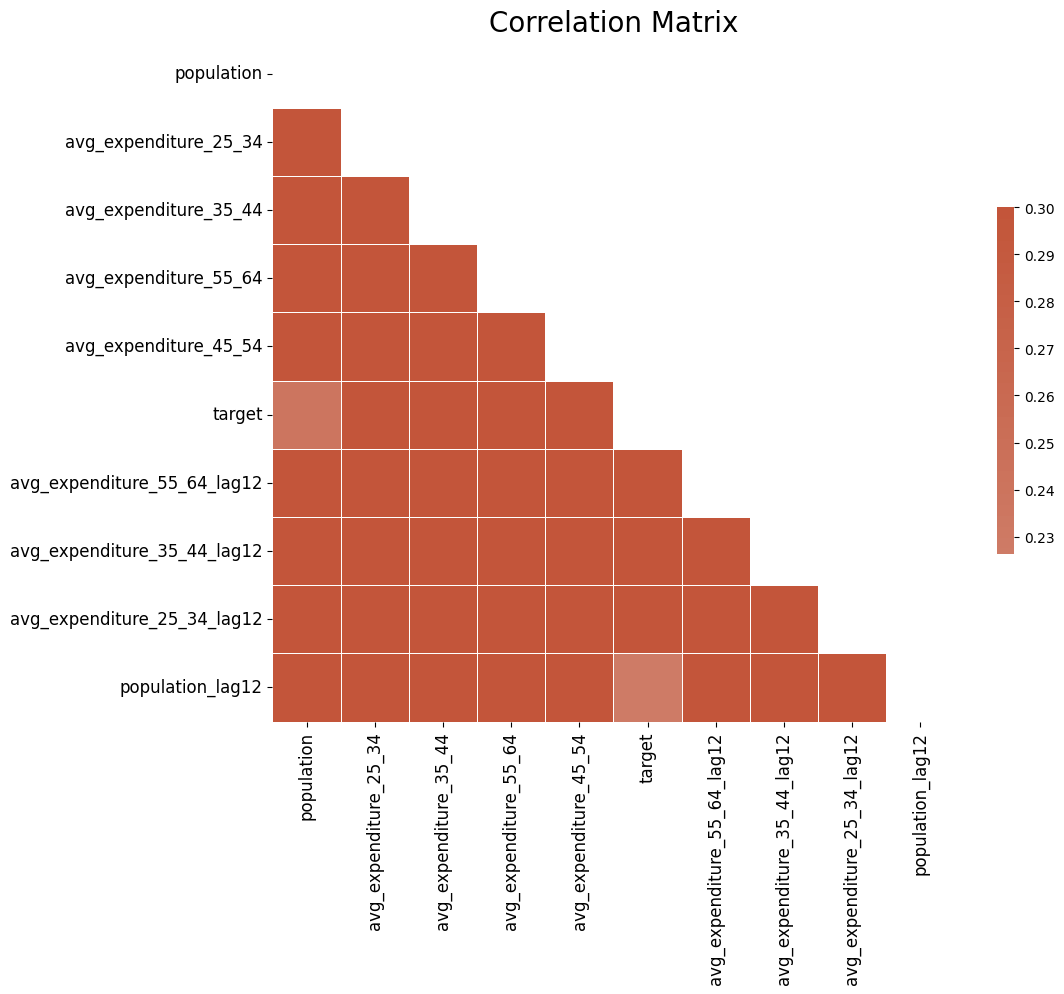

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = demodf.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [25]:
# Print correlation values
print(corr)

# Interpretation
for col in corr.columns:
    print(f"\nInterpretation for {col}:")
    correlated_cols = corr[col][(corr[col] > 0.5) | (corr[col] < -0.5)].index.tolist()
    if correlated_cols:
        for correlated_col in correlated_cols:
            if correlated_col != col:
                if corr.loc[col, correlated_col] > 0:
                    print(f"{col} has a strong positive correlation with {correlated_col}.")
                else:
                    print(f"{col} has a strong negative correlation with {correlated_col}.")
    else:
        print(f"{col} does not have a strong correlation with any other variables.")


                             population  avg_expenditure_25_34  \
population                     1.000000               0.916479   
avg_expenditure_25_34          0.916479               1.000000   
avg_expenditure_35_44          0.886858               0.978719   
avg_expenditure_55_64          0.935500               0.982598   
avg_expenditure_45_54          0.929426               0.966449   
target                         0.237052               0.502215   
avg_expenditure_55_64_lag12    0.941846               0.938263   
avg_expenditure_35_44_lag12    0.897390               0.940010   
avg_expenditure_25_34_lag12    0.927154               0.949772   
population_lag12               0.999873               0.911341   

                             avg_expenditure_35_44  avg_expenditure_55_64  \
population                                0.886858               0.935500   
avg_expenditure_25_34                     0.978719               0.982598   
avg_expenditure_35_44                     

**Interpretation:**

population and population_lag12: The correlation is very close to 1 (0.999873), indicating a very strong positive correlation. This suggests that the population value of the current month is highly dependent on the value from 12 months ago.

avg_expenditure_25_34 and avg_expenditure_25_34_lag12: The correlation is also high (0.949772), indicating a strong positive relationship between the expenditure of the age group 25-34 now and 12 months ago.

target and other variables: The correlations are relatively low (ranging from 0.226360 to 0.563733), suggesting that the target variable has a weak to moderate relationship with other variables.

avg_expenditure_55_64 and avg_expenditure_55_64_lag12: The correlation is high (0.959612), indicating a strong positive relationship between the expenditure of the age group 55-64 now and 12 months ago.

These correlations suggest that there are strong relationships between current values and their corresponding values from 12 months ago, which is common in time series data. However, while correlation can indicate a relationship between variables, it does not imply causation. Further statistical testing needed to determine any causal relationships.



In [26]:
# List of columns to create rate for
cols = ['avg_expenditure_55_64', 'avg_expenditure_35_44', 'avg_expenditure_25_34', 'avg_expenditure_45_54']

# Loop through the list and create rate columns
for col in cols:
    demodf[f'{col}_rate'] = np.log(demodf[col] / demodf[col].shift(12))

# Remember to handle any potential infinite or missing values that might result from the division or logarithm operation.



In [27]:
(demodf.corr())

,population,avg_expenditure_25_34,avg_expenditure_35_44,avg_expenditure_55_64,avg_expenditure_45_54,target,avg_expenditure_55_64_lag12,avg_expenditure_35_44_lag12,avg_expenditure_25_34_lag12,population_lag12,avg_expenditure_55_64_rate,avg_expenditure_35_44_rate,avg_expenditure_25_34_rate,avg_expenditure_45_54_rate
population,1.000000,0.916479,0.886858,0.935500,0.929426,0.237052,0.941846,0.897390,0.927154,0.999873,-0.326045,-0.107623,-0.275046,-0.052165
avg_expenditure_25_34,0.916479,1.000000,0.978719,0.982598,0.966449,0.502215,0.938263,0.940010,0.949772,0.911341,-0.129256,0.061842,-0.078024,0.083090
avg_expenditure_35_44,0.886858,0.978719,1.000000,0.969284,0.976150,0.563733,0.931590,0.940682,0.935488,0.879996,-0.158870,0.119514,-0.095454,0.101773
avg_expenditure_55_64,0.935500,0.982598,0.969284,1.000000,0.971687,0.457406,0.959612,0.943974,0.966569,0.930815,-0.152000,0.017696,-0.201070,0.062496
avg_expenditure_45_54,0.929426,0.966449,0.976150,0.971687,1.000000,0.489811,0.941884,0.924538,0.922306,0.924631,-0.188961,0.093074,-0.092502,0.187179
target,0.237052,0.502215,0.563733,0.457406,0.489811,1.000000,0.366832,0.349961,0.346783,0.226360,0.331433,0.715677,0.459702,0.444203
avg_expenditure_55_64_lag12,0.941846,0.938263,0.931590,0.959612,0.941884,0.366832,1.000000,0.973694,0.982294,0.937254,-0.470855,-0.213357,-0.423738,-0.162504
avg_expenditure_35_44_lag12,0.897390,0.940010,0.940682,0.943974,0.924538,0.349961,0.973694,1.000000,0.982953,0.891305,-0.426200,-0.272206,-0.407751,-0.197298
avg_expenditure_25_34_lag12,0.927154,0.949772,0.935488,0.966569,0.922306,0.346783,0.982294,0.982953,1.000000,0.922247,-0.376088,-0.227333,-0.430402,-0.203504
population_lag12,0.999873,0.911341,0.879996,0.930815,0.924631,0.226360,0.937254,0.891305,0.922247,1.000000,-0.324861,-0.109746,-0.274073,-0.052423


Based on the data available, the median age of first-time homebuyers in the United States is 33³⁵. However, the median age of all homebuyers is now 47³⁵, and the average age is 45⁴. The homeownership rate among Americans under 35 years was 39 percent as of the third quarter of 2022¹. Please note that these figures are based on data up to the year 2023¹ and may have changed since then.

Source: 9/30/2023

(1) The Average Age to Buy a House in 2023: Yearly and ... - HomeCity. https://www.homecity.com/blog/the-average-age-to-buy-a-house/.

(2) It's taking Americans much longer in life to buy their first home. https://www.cbsnews.com/news/average-homebuyer-age-millennial-data-realtor/.

(3) Buyers: Results from the Zillow Consumer Housing Trends Report 2021. https://www.zillow.com/research/buyers-consumer-housing-trends-report-2021-30039/.

(4) U.S. homeownership rate by age 2022 | Statista. https://www.statista.com/statistics/1036066/homeownership-rate-by-age-usa/.
(5) Homeowner Data and Statistics 2023 | Bankrate. https://www.bankrate.com/homeownership/home-ownership-statistics/.

# Since median age of homebuyers(all) is 47 years in USA, we'll combine average expenditure 35-44 age group with average expenditure 45-54 age group

In [28]:
df["avg_expenditure_35_54"] = df["avg_expenditure_35_44"] +df["avg_expenditure_45_54"]

In [29]:
df["avg_expenditure_35_54"]

2001-01-31     91604.0
2001-02-28     91899.0
2001-03-31     92194.0
2001-04-30     92489.0
2001-05-31     92784.0
                ...   
2015-08-31    132779.0
2015-09-30    133356.0
2015-10-31    133933.0
2015-11-30    134510.0
2015-12-31    135087.0
Freq: M, Name: avg_expenditure_35_54, Length: 180, dtype: float64

# Mortgages

HCAI_GOVT

HCAI_GSE

HCAI_PP

MORTGAGE30US


# Analysizing from Mortgages:


**Housing Credit Availability Index (HCAI):** These datasets contain information about the HCAI for government loans, GSE loans, and private portfolio loans.

In [30]:
mordf = df.copy()
mordf = mordf[["target","HCAI_GOVT","HCAI_GSE","HCAI_PP","MORTGAGE30US"]]
mordf

,target,HCAI_GOVT,HCAI_GSE,HCAI_PP,MORTGAGE30US
2001-01-31,109.845,22.218,5.836,16.253,7.0325
2001-02-28,110.499,22.108,5.776,16.053,7.0500
2001-03-31,111.107,21.998,5.716,15.853,6.9520
2001-04-30,111.650,21.887,5.647,15.664,7.0775
2001-05-31,112.162,22.037,5.617,15.514,7.1450
...,...,...,...,...,...
2015-08-31,172.954,9.735,2.221,2.358,3.9050
2015-09-30,173.848,9.775,2.231,2.388,3.8900
2015-10-31,174.811,9.805,2.230,2.432,3.7960
2015-11-30,175.755,9.945,2.260,2.492,3.9425


# Checking the distibution of data

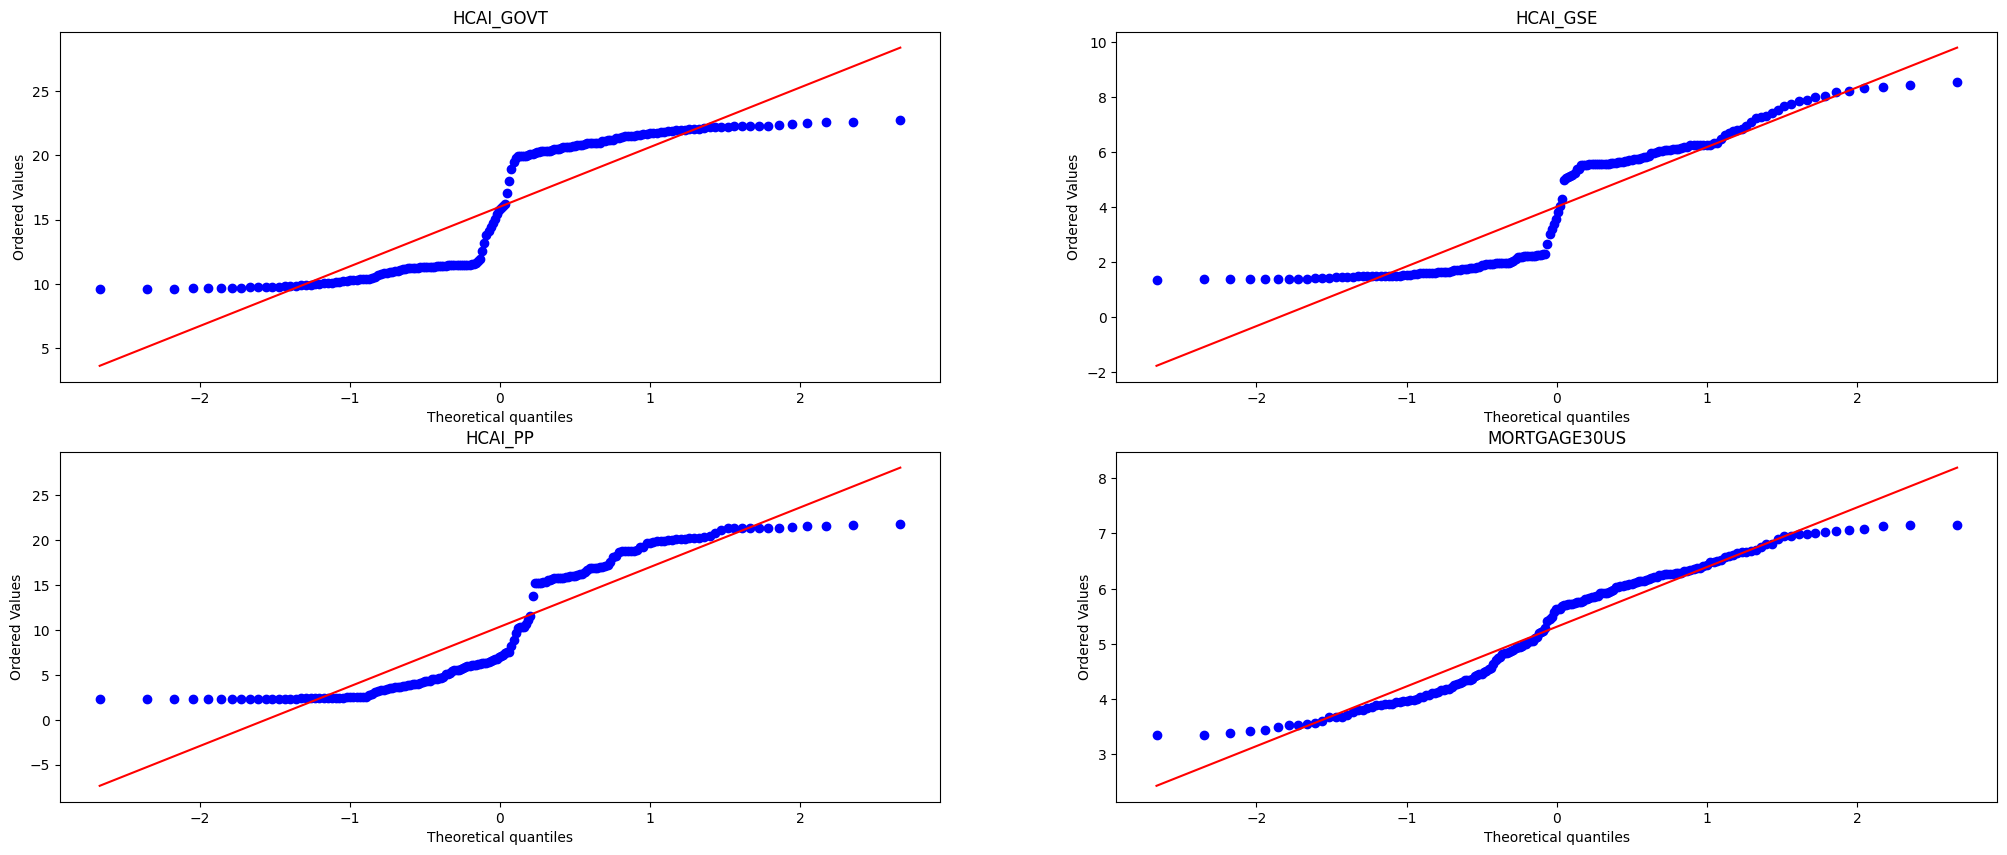

In [31]:
# Create subplots
figure, axis = plt.subplots(2, 2, figsize=(25,10))

stats.probplot(mordf['HCAI_GOVT'], plot=axis[0, 0])
axis[0, 0].set_title("HCAI_GOVT")

stats.probplot(mordf['HCAI_GSE'], plot=axis[0, 1])
axis[0, 1].set_title("HCAI_GSE")

stats.probplot(mordf['HCAI_PP'], plot=axis[1, 0])
axis[1, 0].set_title("HCAI_PP")

stats.probplot(mordf['MORTGAGE30US'], plot=axis[1, 1])
axis[1, 1].set_title("MORTGAGE30US")

plt.show()



Observation:

Data is not normally distibuted
    

# Checking for outliers

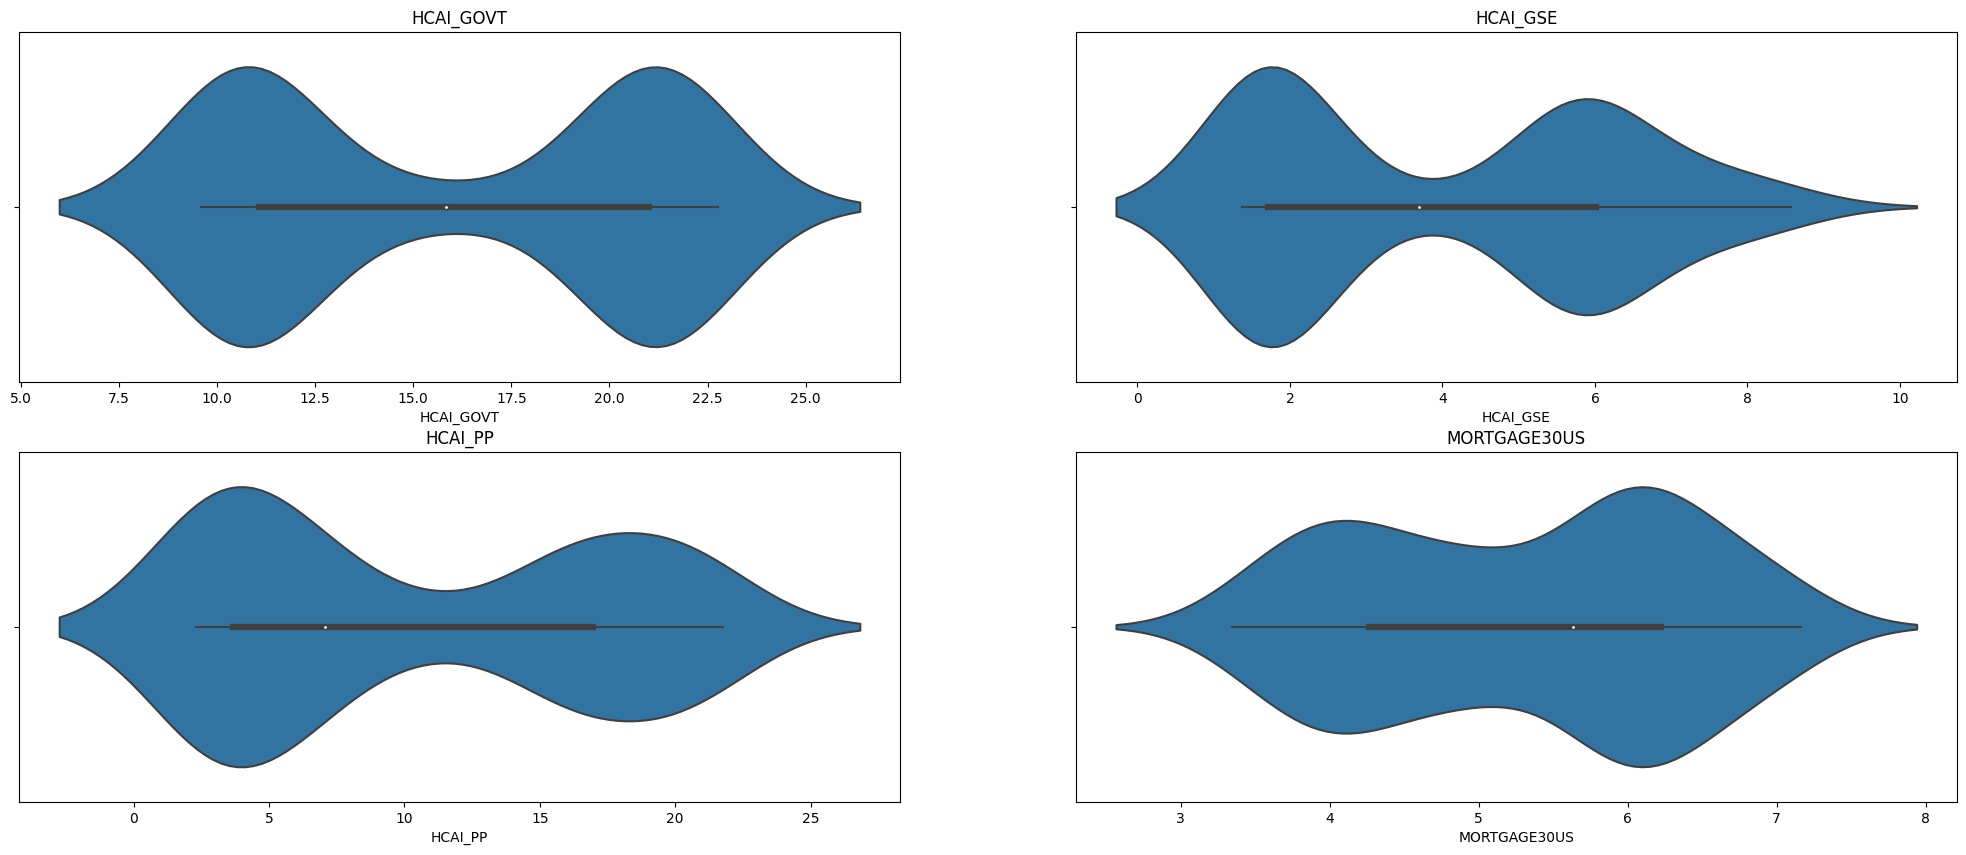

In [32]:

# Create subplots
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.violinplot(x=mordf['HCAI_GOVT'], ax=axis[0, 0])
axis[0, 0].set_title("HCAI_GOVT")

sns.violinplot(x=mordf['HCAI_GSE'], ax=axis[0, 1])
axis[0, 1].set_title("HCAI_GSE")

sns.violinplot(x=mordf['HCAI_PP'], ax=axis[1, 0])
axis[1, 0].set_title("HCAI_PP")

sns.violinplot(x=mordf['MORTGAGE30US'], ax=axis[1, 1])
axis[1, 1].set_title("MORTGAGE30US")

plt.show()


observations:

The data is not normally distributed, as indicated by the asymmetrical shapes of the violin plots.

There is evidence of skewness in our data, with the distribution appearing more spread out on one side of the median.

The density of data points varies across the range of our variables, suggesting differing frequencies of values.


In [33]:

# Create lagged columns
#lag = 96
#mordf["HCAI_GSE_lag"] = mordf.HCAI_GSE.shift(lag)
#mordf["HCAI_GOVT_lag"] = mordf.HCAI_GOVT.shift(lag)
#mordf["HCAI_PP_lag"] = mordf.HCAI_PP.shift(lag)
#mordf["MORTGAGE30US_lag"] = mordf.MORTGAGE30US.shift(lag)

# Drop NA values
#mordf = mordf.dropna()

# Compute correlation
#correlation_matrix = mordf.corr()

# Print correlation matrix
#print(correlation_matrix)



Observation:

correlation between target and HCAI_GSE is approximately 0.97, indicating a strong positive relationship. On the other hand, target and HCAI_GOVT have a correlation of approximately -0.66, indicating a moderate negative relationship.

The diagonal elements of the matrix are always 1 because each variable has a perfect positive correlation with itself.

The correlations with lagged variables show how the current target variable correlates with past values of other variables. For example, target and HCAI_GSE_lag have a correlation of approximately 0.81, indicating a strong positive relationship between the current target and the HCAI_GSE value 96 periods ago.

# Creating the line Plots 

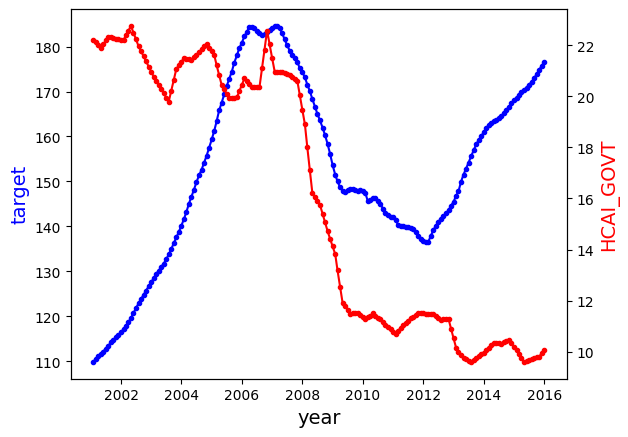

[[ 1.         -0.11447179]
 [-0.11447179  1.        ]]


In [34]:
plot_line(mordf,"target","HCAI_GOVT")

**Observation:**

The off-diagonal elements represent the correlation between the two variables. In this case, the correlation is approximately -0.11, indicating a weak negative relationship.

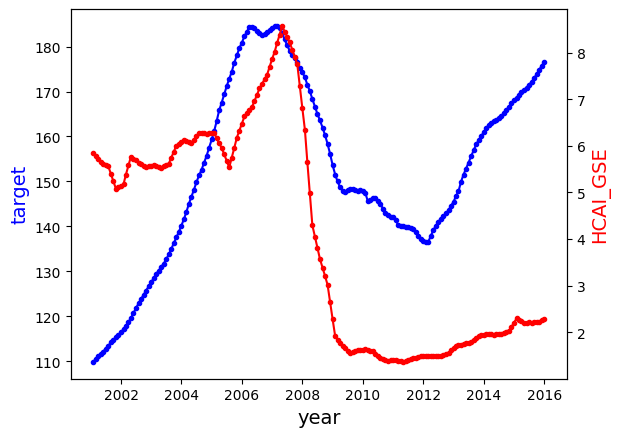

[[1.         0.20015417]
 [0.20015417 1.        ]]


In [35]:
plot_line(mordf,"target","HCAI_GSE")

**Observation:**

The off-diagonal elements represent the correlation between the two variables. In this case, the correlation is approximately 0.20, indicating a weak positive relationship.

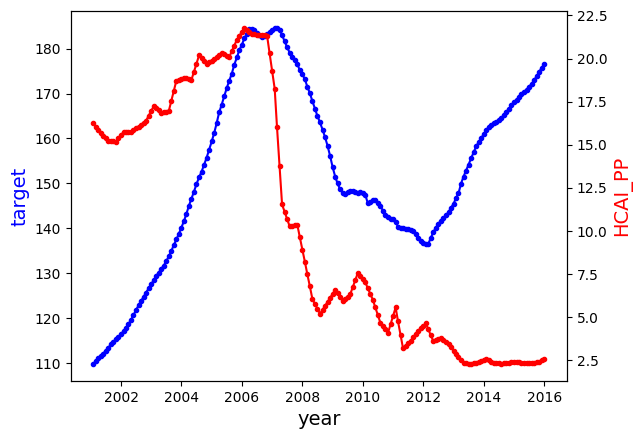

[[ 1.         -0.02275183]
 [-0.02275183  1.        ]]


In [36]:
plot_line(mordf,"target","HCAI_PP")

**Observation:**

The off-diagonal elements represent the correlation between the two variables. In this case, the correlation is approximately -0.02, indicating a very weak negative relationship.

The Housing Credit Availability Index (HCAI) measures the percentage of owner-occupied home purchase loans that are likely to default, i.e., go unpaid for more than 90 days past their due date1. A lower HCAI indicates that lenders are unwilling to tolerate defaults and are imposing tighter lending standards, making it harder to get a loan. A higher HCAI indicates that lenders are willing to tolerate defaults and are taking more risks, making it easier to get a loan1

**For the period of 2002 - 2020**, the HCAI — has generally been increasing since the financial crisis. In Q3 2018, the index reached 3 percent for the first time since 2008, and then continued to increase in the following two quarters, reaching 3.07 percent in Q1 20191. The index went through a period of tightening for the remainder of 2019 and 2020, dropping to 2.53 percent in Q4 20201.

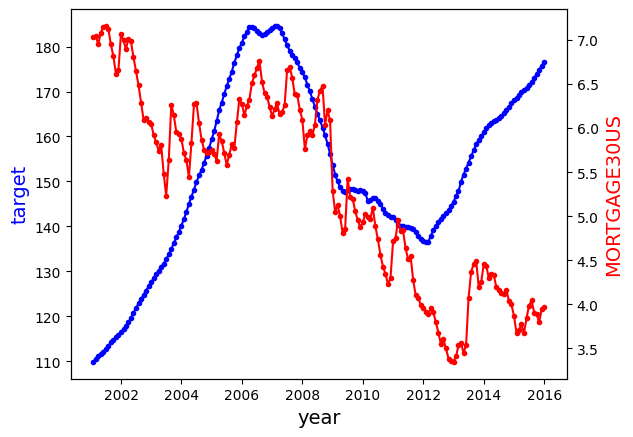

[[ 1.         -0.11660445]
 [-0.11660445  1.        ]]


In [37]:
plot_line(mordf,"target","MORTGAGE30US")

Observation:

The Housing Credit Availability Index (HCAI) measures the percentage of owner-occupied home purchase loans that are likely to default, i.e., go unpaid for more than 90 days past their due date1. A lower HCAI indicates that lenders are unwilling to tolerate defaults and are imposing tighter lending standards, making it harder to get a loan. A higher HCAI indicates that lenders are willing to tolerate defaults and are taking more risks, making it easier to get a loan1.

For the period of 2002 - 2020,  has generally been increasing since the financial crisis. In Q3 2018, the index reached 3 percent for the first time since 2008, and then continued to increase in the following two quarters, reaching 3.07 percent in Q1 20191. The index went through a period of tightening for the remainder of 2019 and 2020, dropping to 2.53 percent in Q4 20201.
    

In [38]:
mordf.corr()

,target,HCAI_GOVT,HCAI_GSE,HCAI_PP,MORTGAGE30US
target,1.000000,-0.114472,0.200154,-0.022752,-0.116604
HCAI_GOVT,-0.114472,1.000000,0.932369,0.922474,0.898562
HCAI_GSE,0.200154,0.932369,1.000000,0.857535,0.822291
HCAI_PP,-0.022752,0.922474,0.857535,1.000000,0.785734
MORTGAGE30US,-0.116604,0.898562,0.822291,0.785734,1.000000


**Observation:**

target and HCAI_GSE have a correlation of 0.200154, suggesting a weak positive relationship.

target and HCAI_GOVT have a correlation of -0.114472, indicating a weak negative relationship.

HCAI_GOVT and HCAI_GSE have a high correlation of 0.932369, indicating a strong positive relationship.

HCAI_PP and MORTGAGE30US also have a strong positive correlation of 0.785734.

# Economic Factors


GDP

CPI

private_job_gains

personal_saving_rate

UNRATE - Unemployment rate

unrate_construction - Unemployment rate in construction industry

In [39]:
ecodf = df.copy()
ecodf = ecodf[["target","GDP","CPI","private_job_gains","UNRATE","unrate_construction"]]
ecodf

,target,GDP,CPI,private_job_gains,UNRATE,unrate_construction
2001-01-31,109.845,10470.231,0.632184,3001.33,4.2,9.8
2001-02-28,110.499,10513.151,0.399772,3001.33,4.2,9.9
2001-03-31,111.107,10556.071,0.227531,3001.33,4.3,8.4
2001-04-30,111.650,10599.000,0.397276,2813.00,4.4,7.1
2001-05-31,112.162,10598.670,0.452233,2813.00,4.3,5.6
...,...,...,...,...,...,...
2015-08-31,172.954,18315.330,-0.141628,2415.67,5.1,6.1
2015-09-30,173.848,18323.700,-0.155676,2415.67,5.0,5.5
2015-10-31,174.811,18332.079,-0.044968,2539.00,5.0,6.2
2015-11-30,175.755,18363.159,-0.211068,2539.00,5.1,6.2


The variables in the data set are:

target: This could be a variable of interest that you want to predict or analyze. The actual meaning would depend on the context of your analysis.

GDP: This stands for Gross Domestic Product, which is a measure of economic activity within a country. It’s the total value of all goods and services produced over a specific time period within a country’s borders.

CPI: This stands for Consumer Price Index, which is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care.

private_job_gains: This could represent the increase in the number of private sector jobs during the given period.

UNRATE: This is likely the unemployment rate, which is the percentage of the total labor force that is jobless but seeking employment and willing to work.

unrate_construction: This could be the unemployment rate specifically within the construction sector.

# Checking the distibution of data:

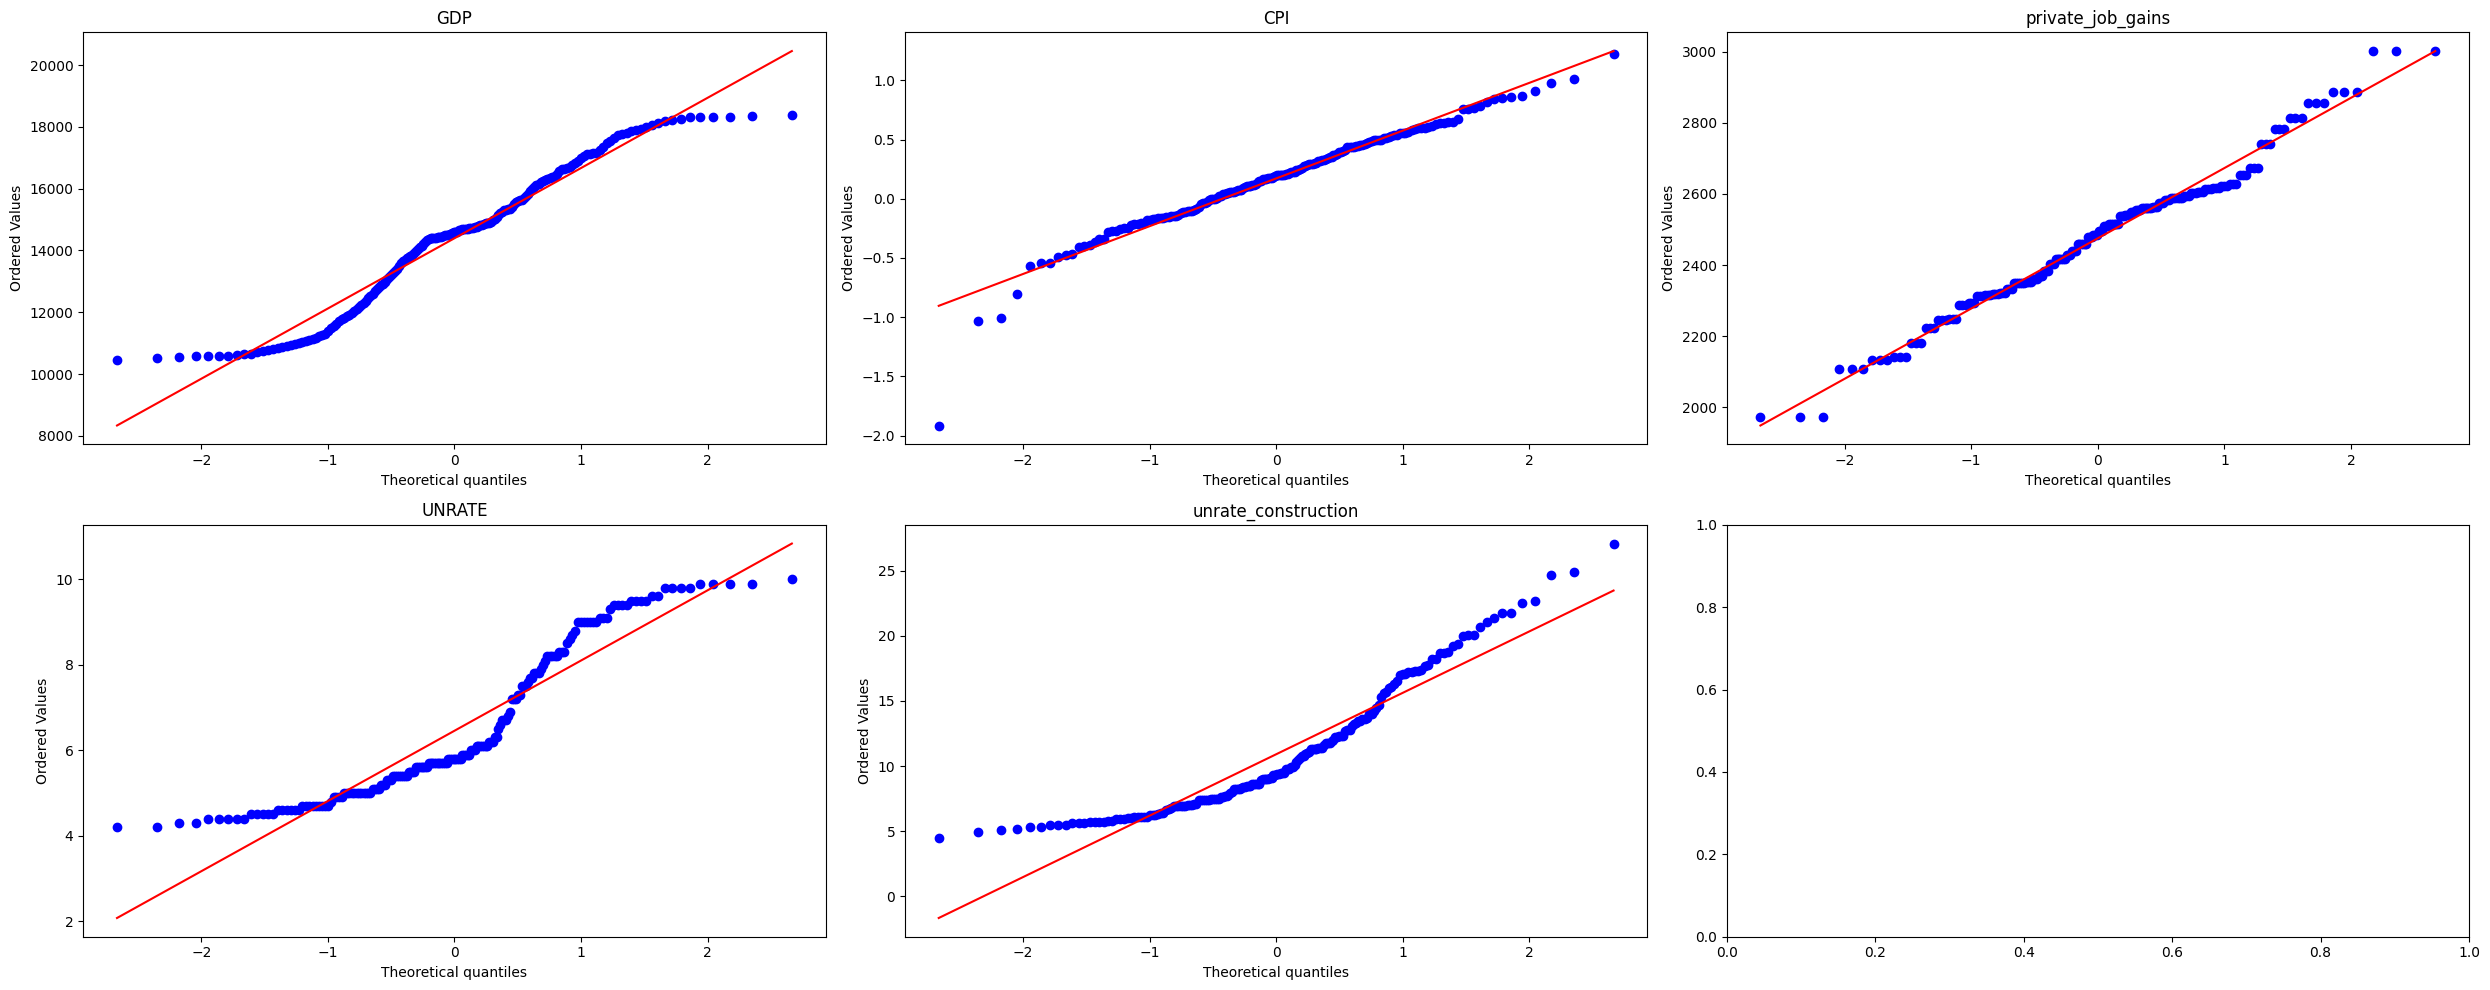

In [40]:
# Create subplots
figure, axis = plt.subplots(2, 3, figsize=(25,10))  # Adjusted to 2 rows and 3 columns

# Plot probplots
stats.probplot(ecodf['GDP'], plot=axis[0, 0])
axis[0, 0].set_title("GDP")

stats.probplot(ecodf['CPI'], plot=axis[0, 1])
axis[0, 1].set_title("CPI")

stats.probplot(ecodf['private_job_gains'], plot=axis[0, 2])  # This should now work
axis[0, 2].set_title("private_job_gains")

stats.probplot(ecodf['UNRATE'], plot=axis[1, 0])
axis[1, 0].set_title("UNRATE")

stats.probplot(ecodf['unrate_construction'], plot=axis[1, 1])
axis[1, 1].set_title("unrate_construction")

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

**Observation:**

Data is not normally distibuted

# Checking for outliers:

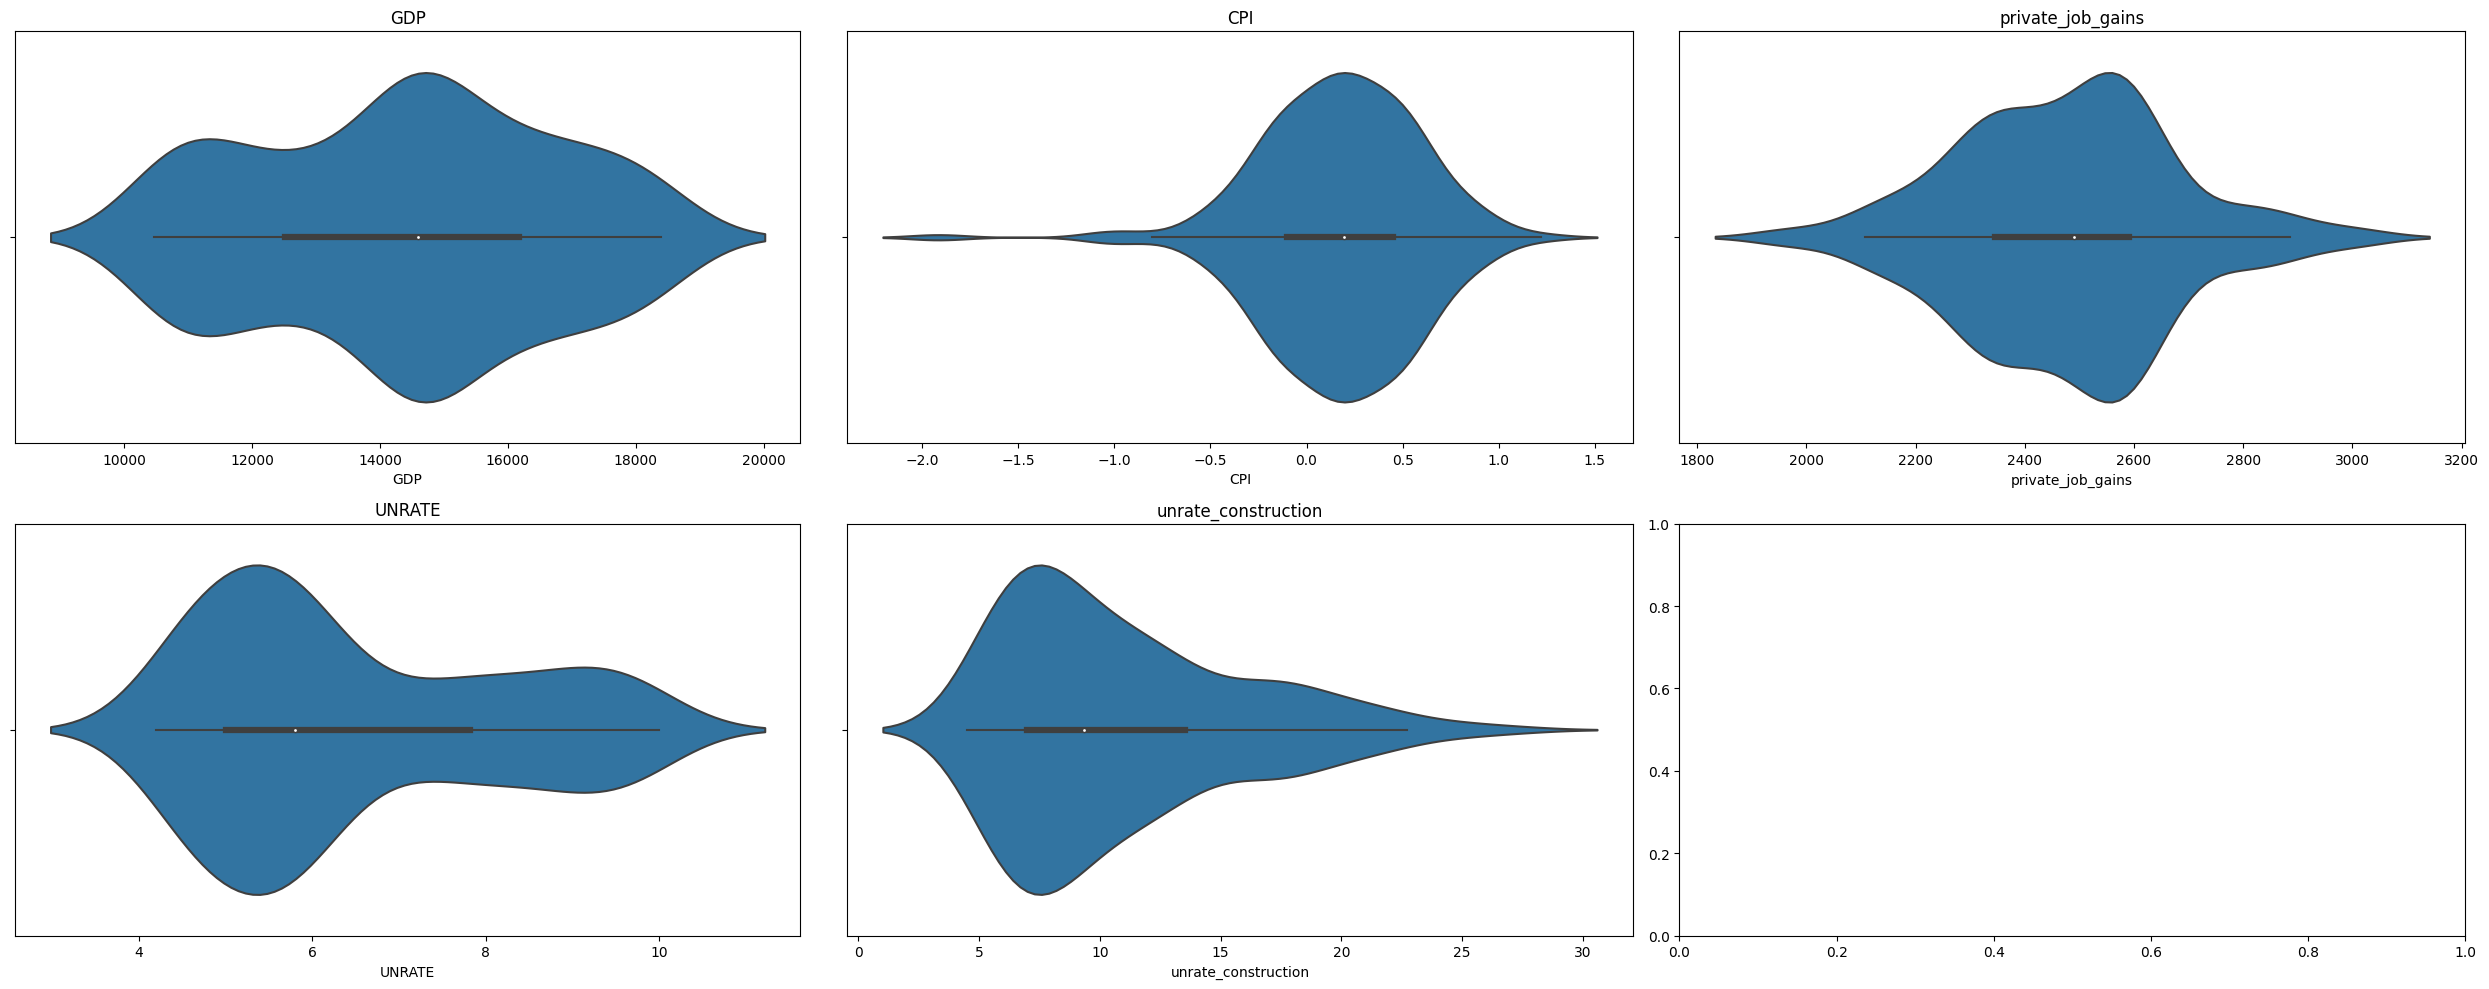

In [41]:
# Create subplots
figure, axis = plt.subplots(2, 3, figsize=(25,10))

# Plot violinplots
sns.violinplot(x=ecodf['GDP'], ax=axis[0, 0])
axis[0, 0].set_title("GDP")

sns.violinplot(x=ecodf['CPI'], ax=axis[0, 1])
axis[0, 1].set_title("CPI")

sns.violinplot(x=ecodf['private_job_gains'], ax=axis[0, 2])
axis[0, 2].set_title("private_job_gains")

sns.violinplot(x=ecodf['UNRATE'], ax=axis[1, 0])
axis[1, 0].set_title("UNRATE")

sns.violinplot(x=ecodf['unrate_construction'], ax=axis[1, 1])
axis[1, 1].set_title("unrate_construction")

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

**observations:**

Outliers are present    

Text(0.5, 1.0, 'unrate_construction')

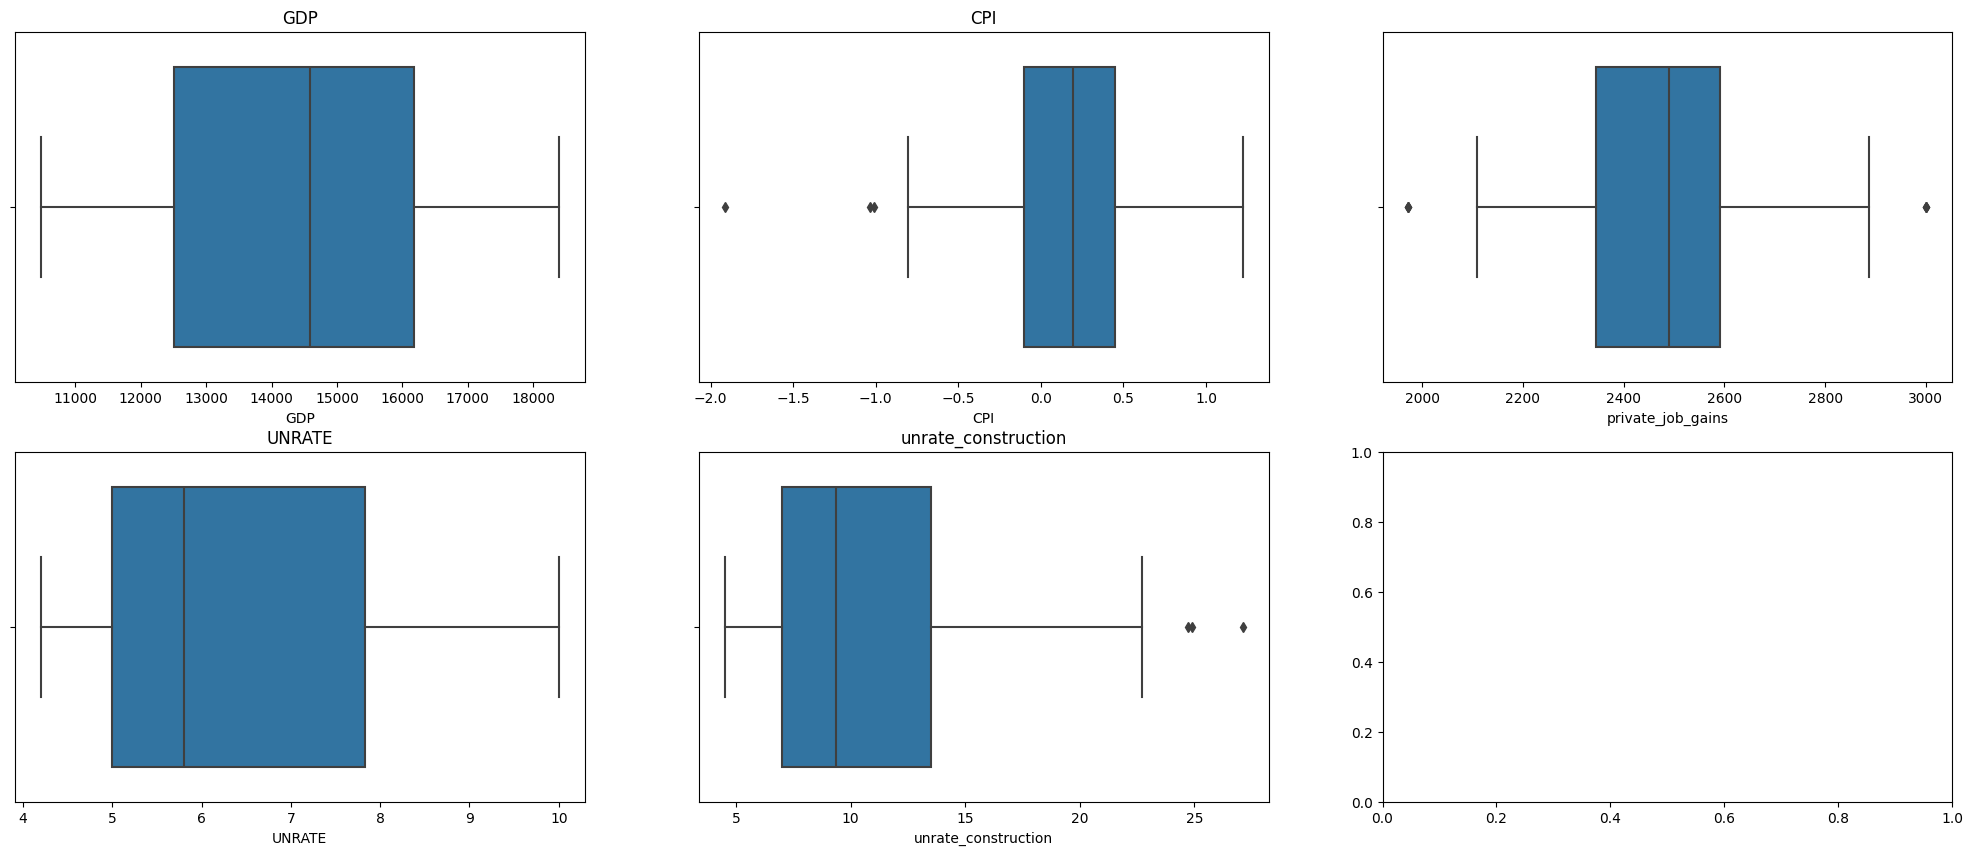

In [42]:
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.boxplot(ecodf['GDP'], ax=axis[0, 0])
axis[0, 0].set_title("GDP")

sns.boxplot(ecodf['CPI'], ax=axis[0, 1])
axis[0, 1].set_title("CPI")


sns.boxplot(ecodf['private_job_gains'], ax=axis[0, 2])
axis[1, 0].set_title("private_job_gains")


sns.boxplot(ecodf['UNRATE'], ax=axis[1, 0])
axis[1, 0].set_title("UNRATE")

sns.boxplot(ecodf['unrate_construction'], ax=axis[1, 1])
axis[1, 1].set_title("unrate_construction")

# Checking Impact of econmic factors on line plot

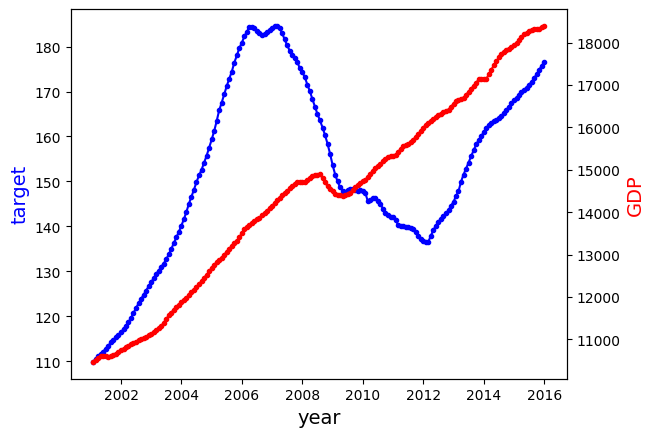

[[1.        0.5157449]
 [0.5157449 1.       ]]


In [43]:
plot_line(ecodf,"target","GDP")

Observation:
   
We see the growth has upward trend but also at the time of 2008 GDP got git due to market recession we observe this in our data.   

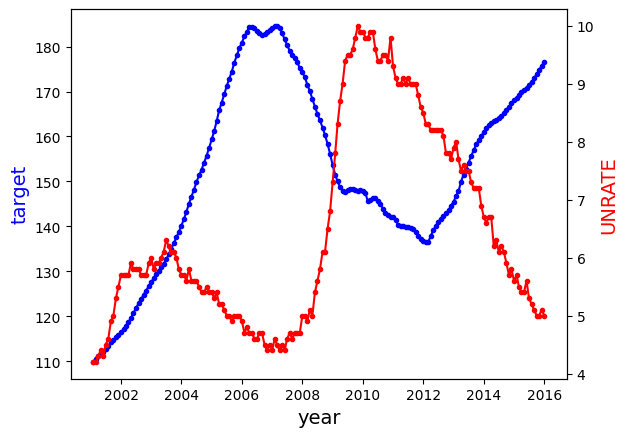

[[ 1.         -0.31435226]
 [-0.31435226  1.        ]]


In [44]:
plot_line(ecodf,"target","UNRATE")

**Observation:**

We see a trend the employment in the period of 2006 - 2008 dropping significantly and started to go up from 2008 after the crash in the market,

this is a significant factor in our analysis to predict the HPI

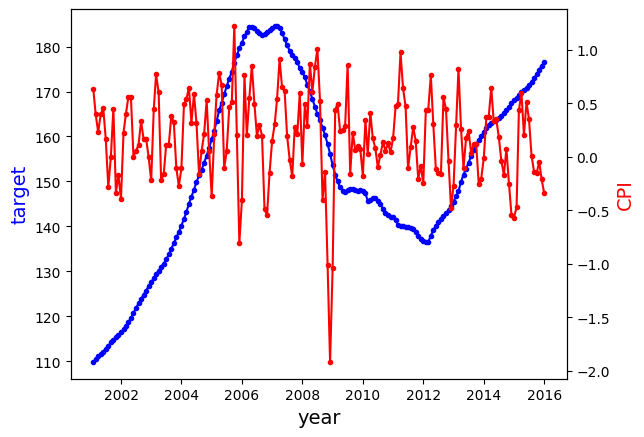

[[1.         0.01191675]
 [0.01191675 1.        ]]


In [45]:
plot_line(ecodf,"target","CPI")

Observation:

We see the points are very scattered there is no fixed pattern and low correaltion with our target

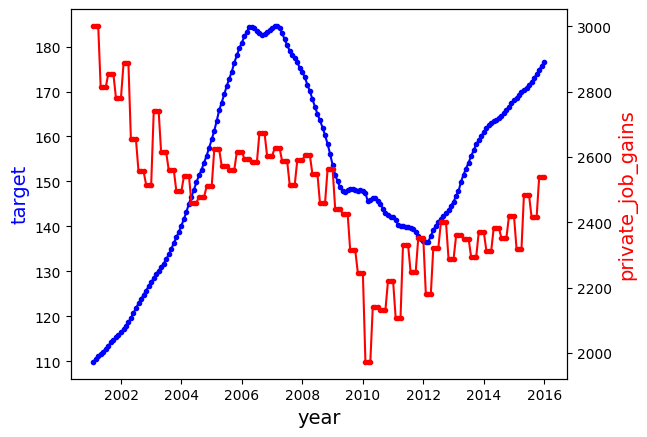

[[ 1.         -0.12654974]
 [-0.12654974  1.        ]]


In [46]:
plot_line(ecodf,"target","private_job_gains")

Observation:

Here also the pattern is not fixed the correlation is weak and inverse.

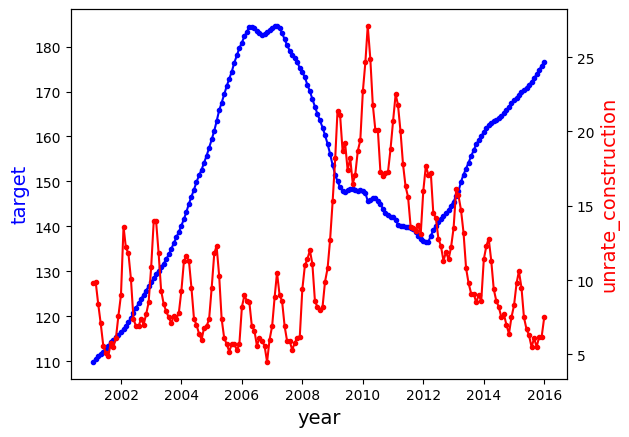

[[ 1.         -0.27891912]
 [-0.27891912  1.        ]]


In [47]:
plot_line(ecodf,"target","unrate_construction")

Observation:

Negative correlation with our target HPI and no fixed pattern its fluctuating in time series.
    

# Using log tranformation to handle outliers


In [48]:
ecodf['unrate_construction'] = np.log(ecodf['unrate_construction'])

Private job gains is number of job gains in the given month, hence we can add a cum sum of the series as a feature

calculating the cumulative sum of the ‘private_job_gains’ column in the ‘ecodf’ DataFrame.

In this context, ‘private_job_gains’ might represent the number of jobs gained in the private sector each month. By using the cumsum() function, we’re adding up these monthly job gains over time to get a running total, which is then stored in a new column ‘private_job_gains_cum’.

In [49]:
ecodf["private_job_gains_cum"] = ecodf["private_job_gains"].cumsum()

In [50]:
np.corrcoef(ecodf["target"],ecodf["private_job_gains_cum"]/ecodf["UNRATE"])

array([[1.        , 0.67467396],
       [0.67467396, 1.        ]])

In [51]:
#creating a new column in the ‘ecodf’ DataFrame named ‘private_job_gains_cum_per_unrate’. 
#The values in this new column are calculated by dividing the values in the ‘private_job_gains_cum’ column by the corresponding values in the ‘UNRATE’ column.
ecodf["private_job_gains_cum_per_unrate"] = ecodf["private_job_gains_cum"]/ecodf["UNRATE"]

<Axes: >

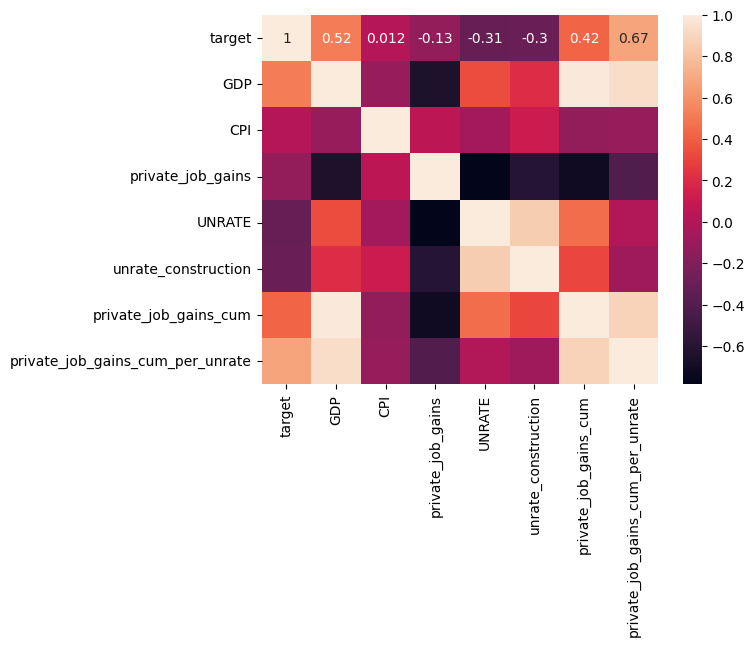

In [52]:
sns.heatmap(ecodf.corr(),annot=True)

In [53]:
ecodf.corr()

,target,GDP,CPI,private_job_gains,UNRATE,unrate_construction,private_job_gains_cum,private_job_gains_cum_per_unrate
target,1.000000,0.515745,0.011917,-0.126550,-0.314352,-0.302098,0.419320,0.674674
GDP,0.515745,1.000000,-0.111063,-0.647996,0.331420,0.208779,0.989998,0.932039
CPI,0.011917,-0.111063,1.000000,0.047018,-0.059533,0.108506,-0.125052,-0.111752
private_job_gains,-0.126550,-0.647996,0.047018,1.000000,-0.785716,-0.609613,-0.714401,-0.412520
UNRATE,-0.314352,0.331420,-0.059533,-0.785716,1.000000,0.856509,0.449166,-0.001431
unrate_construction,-0.302098,0.208779,0.108506,-0.609613,0.856509,1.000000,0.311382,-0.080758
private_job_gains_cum,0.419320,0.989998,-0.125052,-0.714401,0.449166,0.311382,1.000000,0.883449
private_job_gains_cum_per_unrate,0.674674,0.932039,-0.111752,-0.412520,-0.001431,-0.080758,0.883449,1.000000


**Observations:**

‘target’ and ‘private_job_gains_cum_per_unrate’: The correlation coefficient is 0.674674, indicating a moderately strong positive relationship. As the cumulative private job gains per unit unemployment rate increases, the target variable also tends to increase.

‘GDP’ and ‘private_job_gains_cum’: The correlation coefficient is 0.989998, suggesting a very strong positive relationship. This implies that as GDP increases, the cumulative private job gains also tend to increase.

‘UNRATE’ and ‘unrate_construction’: The correlation coefficient is 0.856509, indicating a strong positive relationship. This suggests that as the overall unemployment rate increases, the unemployment rate in the construction sector also tends to increase.

‘private_job_gains’ and ‘UNRATE’: The correlation coefficient is -0.785716, indicating a strong negative relationship. This implies that as private job gains increase, the overall unemployment rate tends to decrease.

We have calculate GDP per capita, hence we can drop GDP
We have also calculated cumulative private job gains per unit unemployment rate
Neither CPI, nor CPI rate is linearly correlated with data
Unemployment rate, private job gains, unemployment rate construction are also highly correlated with each other

<Axes: xlabel='private_job_gains_cum'>

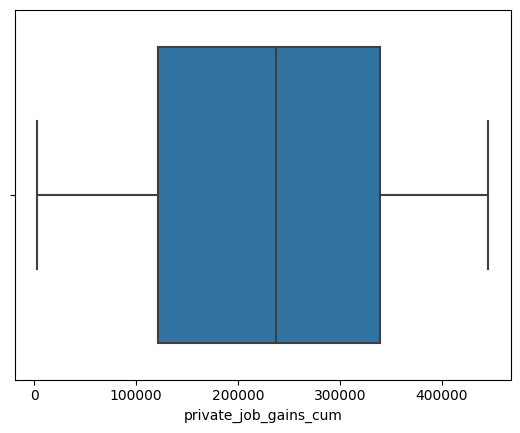

In [54]:
sns.boxplot(ecodf['private_job_gains_cum'])

Normally distibuted no outliers

# Construction Industry

employees_construction

industrial_production_cement

pvt_owned_house_under_const

residential_const_val

producer_price_index_concrete_brick

In [55]:
condf = df.copy()
condf = condf[["target","employees_construction","industrial_production_cement","pvt_owned_house_under_const","residential_const_val","producer_price_index_concrete_brick"]]

In [56]:
condf

,target,employees_construction,industrial_production_cement,pvt_owned_house_under_const,residential_const_val,producer_price_index_concrete_brick
2001-01-31,109.845,6824,139.6212,986.0,348279,144.2
2001-02-28,110.499,6841,144.0119,987.0,353629,144.2
2001-03-31,111.107,6862,147.6176,1001.0,350029,144.2
2001-04-30,111.650,6844,152.7136,1007.0,361991,148.0
2001-05-31,112.162,6849,149.7220,1015.0,360534,149.3
...,...,...,...,...,...,...
2015-08-31,172.954,6490,114.2742,921.0,438567,208.4
2015-09-30,173.848,6508,114.3883,939.0,447202,208.4
2015-10-31,174.811,6547,113.1105,943.0,448312,208.4
2015-11-30,175.755,6598,112.9790,962.0,447200,208.4


In [57]:
#creating new column from existing
condf["construction_cost"] = condf["residential_const_val"] / condf["pvt_owned_house_under_const"]

In [58]:
condf["employees_construction_cum"] = condf["employees_construction"].cumsum()
condf["residential_const_val_cum"] = condf["residential_const_val"].cumsum()
condf["pvt_owned_house_under_const_cum"] = condf["pvt_owned_house_under_const"].cumsum()
condf["industrial_production_cement_cum"] = condf["industrial_production_cement"].cumsum()
condf["construction_cost_cum"] = condf["construction_cost"].cumsum()

<Axes: >

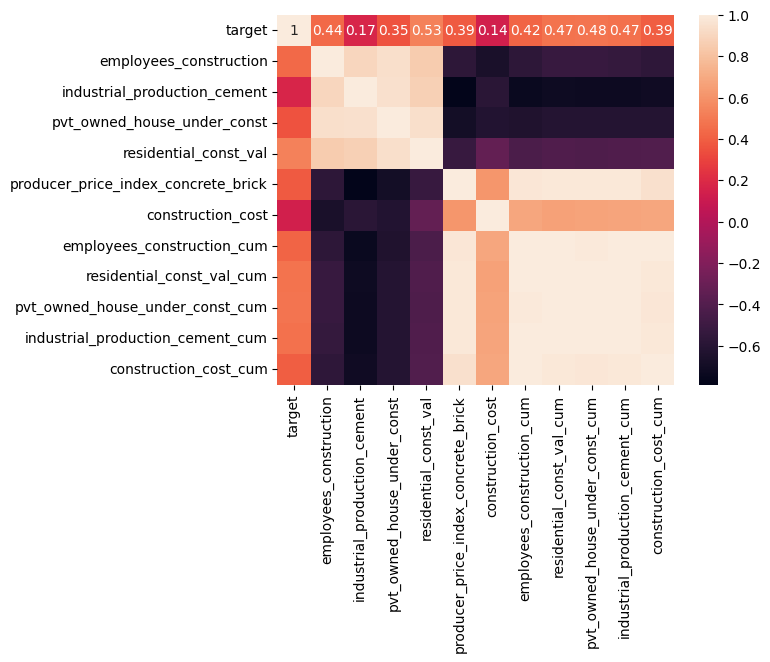

In [59]:
sns.heatmap(condf.corr(),annot=True)

In [60]:
condf.corr()

,target,employees_construction,industrial_production_cement,pvt_owned_house_under_const,residential_const_val,producer_price_index_concrete_brick,construction_cost,employees_construction_cum,residential_const_val_cum,pvt_owned_house_under_const_cum,industrial_production_cement_cum,construction_cost_cum
target,1.000000,0.441405,0.173949,0.354109,0.530377,0.385425,0.136215,0.418927,0.473253,0.476754,0.465673,0.393501
employees_construction,0.441405,1.000000,0.898777,0.942423,0.850321,-0.570863,-0.662786,-0.571330,-0.525225,-0.528429,-0.537196,-0.570012
industrial_production_cement,0.173949,0.898777,1.000000,0.948309,0.869379,-0.787254,-0.589783,-0.738562,-0.723448,-0.730511,-0.726064,-0.712436
pvt_owned_house_under_const,0.354109,0.942423,0.948309,1.000000,0.940477,-0.690493,-0.623354,-0.636224,-0.613256,-0.619505,-0.617266,-0.615638
residential_const_val,0.530377,0.850321,0.869379,0.940477,1.000000,-0.528578,-0.331984,-0.431819,-0.412463,-0.419128,-0.413032,-0.407841
producer_price_index_concrete_brick,0.385425,-0.570863,-0.787254,-0.690493,-0.528578,1.000000,0.613379,0.973376,0.981960,0.983517,0.979777,0.949985
construction_cost,0.136215,-0.662786,-0.589783,-0.623354,-0.331984,0.613379,1.000000,0.683604,0.663038,0.665999,0.672786,0.681512
employees_construction_cum,0.418927,-0.571330,-0.738562,-0.636224,-0.431819,0.973376,0.683604,1.000000,0.995270,0.991818,0.996618,0.993898
residential_const_val_cum,0.473253,-0.525225,-0.723448,-0.613256,-0.412463,0.981960,0.663038,0.995270,1.000000,0.999106,0.999484,0.980429
pvt_owned_house_under_const_cum,0.476754,-0.528429,-0.730511,-0.619505,-0.419128,0.983517,0.665999,0.991818,0.999106,1.000000,0.998702,0.972637


**observations:**

‘target’ and ‘residential_const_val’: The correlation coefficient is 0.530377, indicating a moderate positive relationship. As the residential construction value increases, the target variable also tends to increase.

‘employees_construction’ and ‘pvt_owned_house_under_const’: The correlation coefficient is 0.942423, suggesting a very strong positive relationship. This implies that as the number of employees in construction increases, the number of privately owned houses under construction also tends to increase.

‘industrial_production_cement’ and ‘producer_price_index_concrete_brick’: The correlation coefficient is -0.787254, indicating a strong negative relationship. This suggests that as the industrial production of cement increases, the producer price index for concrete brick tends to decrease.

‘pvt_owned_house_under_const_cum’ and ‘residential_const_val_cum’: The correlation coefficient is 0.999106, which is very close to 1, indicating a very strong positive relationship. This suggests that the cumulative number of privately owned houses under construction and the cumulative residential construction value are almost perfectly correlated.

In [61]:
#x = 12: This sets the window size for the rolling operation to 12. 
#This means that for each point in the data, the sum will be calculated over a window of 12 previous points (including the current point).

x = 12
condf["employees_construction_cum"] = condf["employees_construction"].rolling(window=x).sum()
condf["residential_const_val_cum"] = condf["residential_const_val"].rolling(window=x).sum()
condf["pvt_owned_house_under_const_cum"] = condf["pvt_owned_house_under_const"].rolling(window=x).sum()
condf["industrial_production_cement_cum"] = condf["industrial_production_cement"].rolling(window=x).sum()
condf["construction_cost_cum"] = condf["construction_cost"].rolling(window=x).sum()

<Axes: >

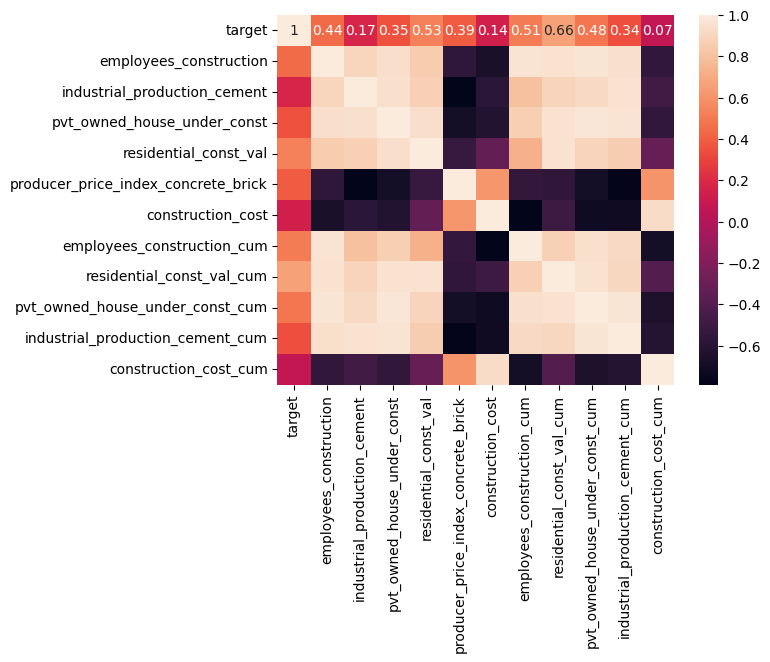

In [62]:
sns.heatmap(condf.corr(),annot=True)


In [63]:
condf.corr()

,target,employees_construction,industrial_production_cement,pvt_owned_house_under_const,residential_const_val,producer_price_index_concrete_brick,construction_cost,employees_construction_cum,residential_const_val_cum,pvt_owned_house_under_const_cum,industrial_production_cement_cum,construction_cost_cum
target,1.000000,0.441405,0.173949,0.354109,0.530377,0.385425,0.136215,0.509185,0.657990,0.484108,0.337420,0.070470
employees_construction,0.441405,1.000000,0.898777,0.942423,0.850321,-0.570863,-0.662786,0.963945,0.952507,0.971559,0.950849,-0.554607
industrial_production_cement,0.173949,0.898777,1.000000,0.948309,0.869379,-0.787254,-0.589783,0.802872,0.889518,0.910084,0.958085,-0.480483
pvt_owned_house_under_const,0.354109,0.942423,0.948309,1.000000,0.940477,-0.690493,-0.623354,0.863278,0.957186,0.973667,0.959426,-0.556525
residential_const_val,0.530377,0.850321,0.869379,0.940477,1.000000,-0.528578,-0.331984,0.730642,0.957982,0.890692,0.860266,-0.319025
producer_price_index_concrete_brick,0.385425,-0.570863,-0.787254,-0.690493,-0.528578,1.000000,0.613379,-0.544150,-0.560932,-0.690978,-0.777362,0.603727
construction_cost,0.136215,-0.662786,-0.589783,-0.623354,-0.331984,0.613379,1.000000,-0.788141,-0.501214,-0.718833,-0.716003,0.925058
employees_construction_cum,0.509185,0.963945,0.802872,0.863278,0.730642,-0.544150,-0.788141,1.000000,0.868120,0.945548,0.910766,-0.692204
residential_const_val_cum,0.657990,0.952507,0.889518,0.957186,0.957982,-0.560932,-0.501214,0.868120,1.000000,0.951733,0.905169,-0.399729
pvt_owned_house_under_const_cum,0.484108,0.971559,0.910084,0.973667,0.890692,-0.690978,-0.718833,0.945548,0.951733,1.000000,0.965669,-0.654154


observations:

‘target’ and ‘residential_const_val_cum’: The correlation coefficient is 0.657990, indicating a strong positive relationship. As the cumulative residential construction value increases, the target variable also tends to increase.

‘employees_construction’ and ‘pvt_owned_house_under_const_cum’: The correlation coefficient is 0.971559, suggesting a very strong positive relationship. This implies that as the cumulative number of employees in construction increases, the cumulative number of privately owned houses under construction also tends to increase.

‘industrial_production_cement’ and ‘producer_price_index_concrete_brick’: The correlation coefficient is -0.787254, indicating a strong negative relationship. This suggests that as the cumulative industrial production of cement increases, the producer price index for concrete brick tends to decrease.

‘construction_cost’ and ‘construction_cost_cum’: The correlation coefficient is 0.925058, which is very close to 1, indicating a very strong positive relationship. This suggests that as construction cost increases, the cumulative construction cost also tends to increase.

<Axes: xlabel='residential_const_val_cum'>

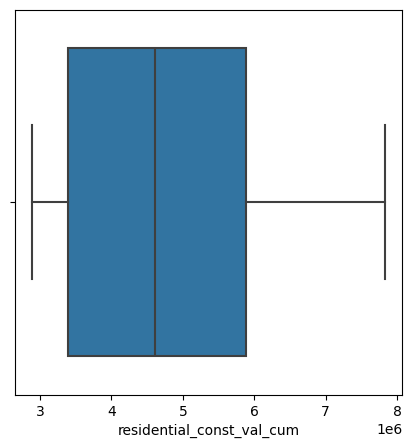

In [64]:
figure, axis = plt.subplots(1,1, figsize=(5,5))

sns.boxplot(condf['residential_const_val_cum'],)

# Housing industry

houses-for-sale-to-sold - Number of houses for sale vs number of houses got sold

home-ownership-rate

house_units_completed - Number of new house units completed in a given month

retail_sales_home_furnishing_stores - Sales of home furnishing stores

In [65]:
houdf = df.copy()

houdf = houdf[["target","houses-for-sale-to-sold","home-ownership-rate","house_units_completed","retail_sales_home_furnishing_stores"]]

In [66]:
houdf

,target,houses-for-sale-to-sold,home-ownership-rate,house_units_completed,retail_sales_home_furnishing_stores
2001-01-31,109.845,3.8,67.10,1456.0,7764
2001-02-28,110.499,3.7,67.17,1536.0,7611
2001-03-31,111.107,3.8,67.24,1470.0,7549
2001-04-30,111.650,3.9,67.31,1574.0,7560
2001-05-31,112.162,4.0,67.30,1497.0,7559
...,...,...,...,...,...
2015-08-31,172.954,5.0,64.29,974.0,9086
2015-09-30,173.848,5.9,64.30,1040.0,9045
2015-10-31,174.811,5.6,64.17,985.0,9162
2015-11-30,175.755,5.5,64.04,1000.0,9152


In [67]:
houdf.corr()

,target,houses-for-sale-to-sold,home-ownership-rate,house_units_completed,retail_sales_home_furnishing_stores
target,1.000000,0.359470,0.081625,0.138613,0.747604
houses-for-sale-to-sold,0.359470,1.000000,0.225595,-0.333334,-0.116558
home-ownership-rate,0.081625,0.225595,1.000000,0.671447,0.224654
house_units_completed,0.138613,-0.333334,0.671447,1.000000,0.634860
retail_sales_home_furnishing_stores,0.747604,-0.116558,0.224654,0.634860,1.000000


**Observations:**

‘target’ and ‘retail_sales_home_furnishing_stores’: The correlation coefficient is 0.747604, indicating a strong positive relationship. As retail sales in home furnishing stores increase, the target variable also tends to increase. (HPI)

‘houses-for-sale-to-sold’ and ‘home-ownership-rate’: The correlation coefficient is 0.225595, suggesting a weak positive relationship. This implies that as the ratio of houses for sale to houses sold increases, the home ownership rate also tends to slightly increase.

‘home-ownership-rate’ and ‘house_units_completed’: The correlation coefficient is 0.671447, indicating a moderately strong positive relationship. This suggests that as the home ownership rate increases, the number of housing units completed also tends to increase.

‘house_units_completed’ and ‘retail_sales_home_furnishing_stores’: The correlation coefficient is 0.634860, which suggests a moderately strong positive relationship. This suggests that as the number of housing units completed increases, retail sales in home furnishing stores also tend to increase.

<Axes: >

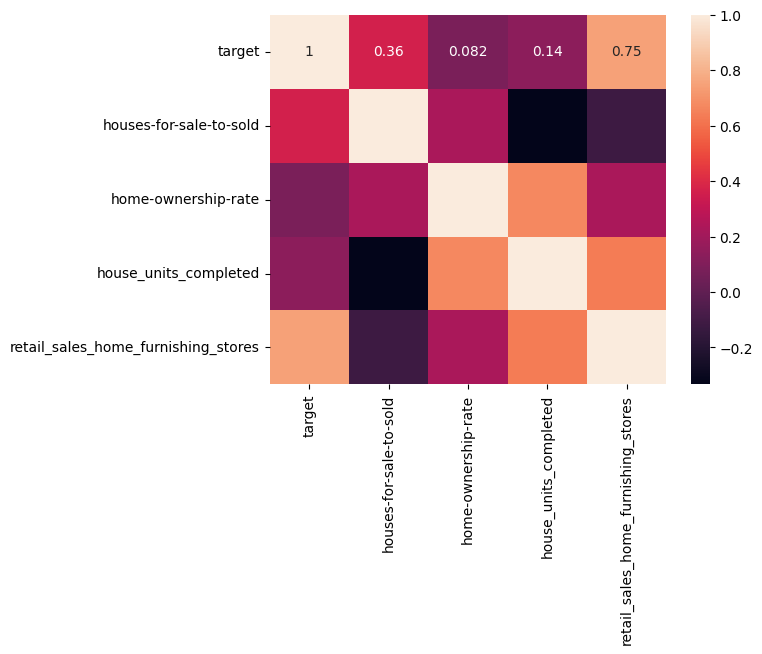

In [68]:
sns.heatmap(houdf.corr(),annot=True)

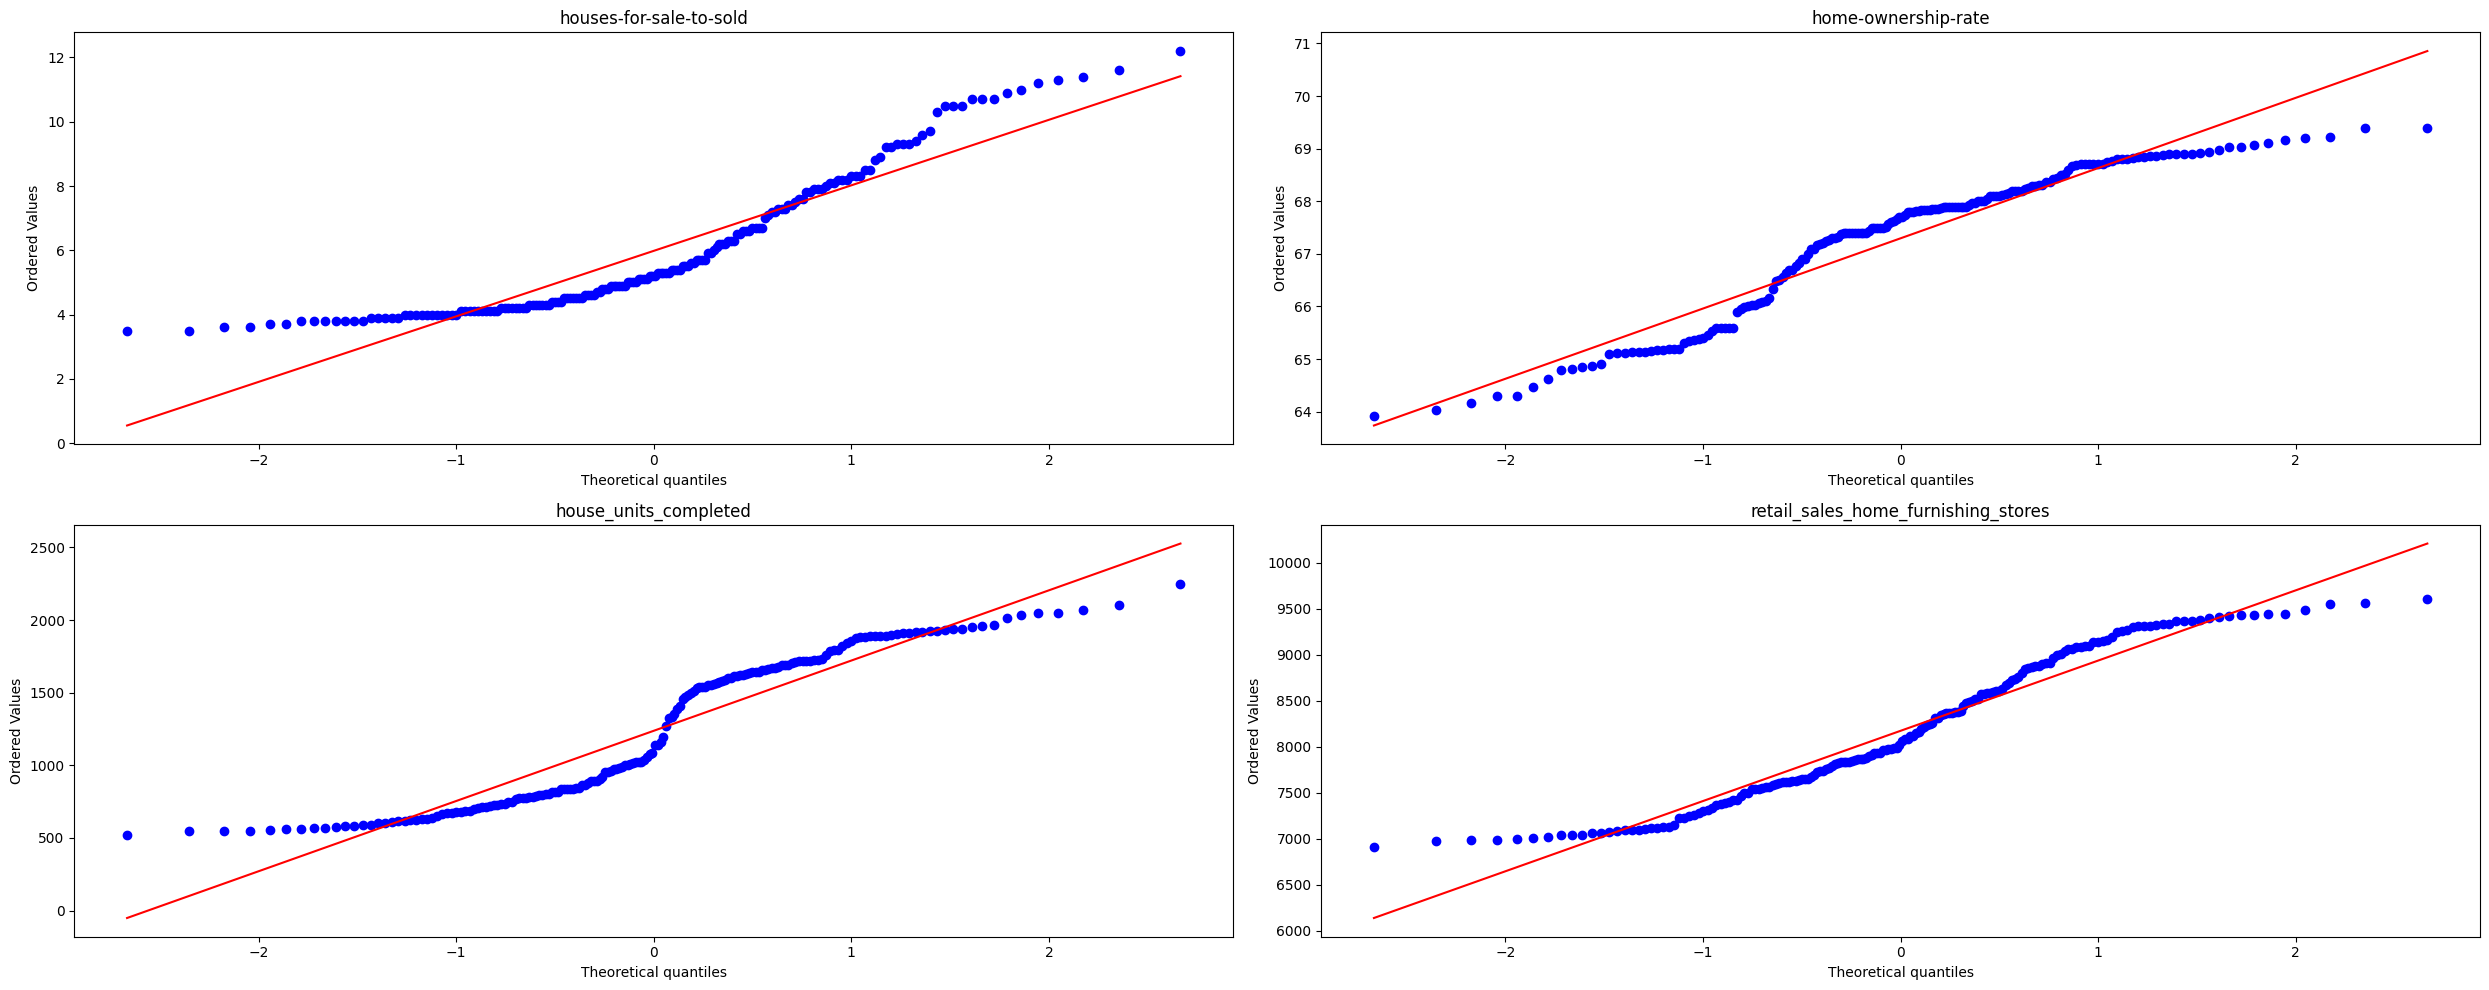

In [69]:
# Create subplots
figure, axis = plt.subplots(2, 2, figsize=(25,10))  # Adjusted to 2 rows and 2 columns

# Plot distplots
stats.probplot(houdf['houses-for-sale-to-sold'], plot=axis[0, 0])
axis[0, 0].set_title("houses-for-sale-to-sold")

stats.probplot(houdf['home-ownership-rate'], plot=axis[0, 1])
axis[0, 1].set_title("home-ownership-rate")

stats.probplot(houdf['house_units_completed'],plot=axis[1, 0])
axis[1, 0].set_title("house_units_completed")

stats.probplot(houdf['retail_sales_home_furnishing_stores'], plot=axis[1, 1])
axis[1, 1].set_title("retail_sales_home_furnishing_stores")

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()



Data is not normally distibuted

Text(0.5, 1.0, 'retail_sales_home_furnishing_stores')

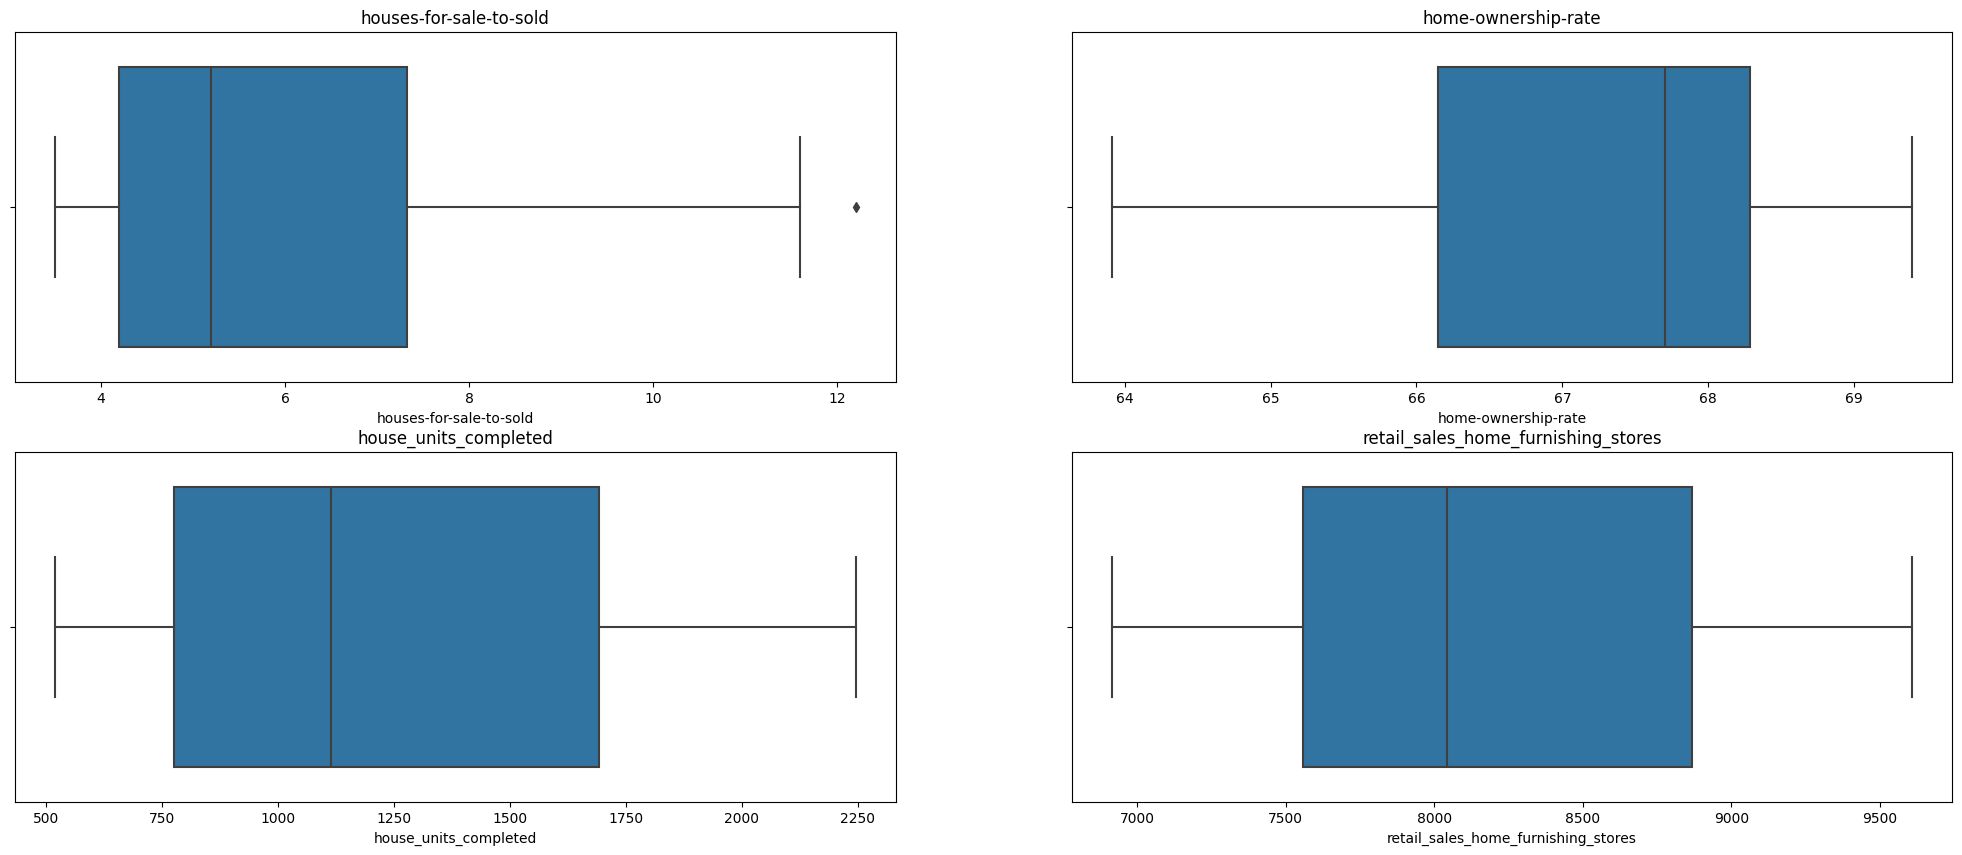

In [70]:
# Box plots 
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.boxplot(houdf['houses-for-sale-to-sold'], ax=axis[0, 0])
axis[0, 0].set_title("houses-for-sale-to-sold")

sns.boxplot(houdf['home-ownership-rate'], ax=axis[0, 1])
axis[0, 1].set_title("home-ownership-rate")



sns.boxplot(houdf['house_units_completed'], ax=axis[1, 0])
axis[1, 0].set_title("house_units_completed")

sns.boxplot(houdf['retail_sales_home_furnishing_stores'], ax=axis[1, 1])
axis[1, 1].set_title("retail_sales_home_furnishing_stores")

Observation:

houses-for-sale-to-sold - Data is skwed and outlier present
Home ownership rate - skwed 
home unit completed data skwed
retail sales home furnishing stores : data is skwed


# Creating line plots

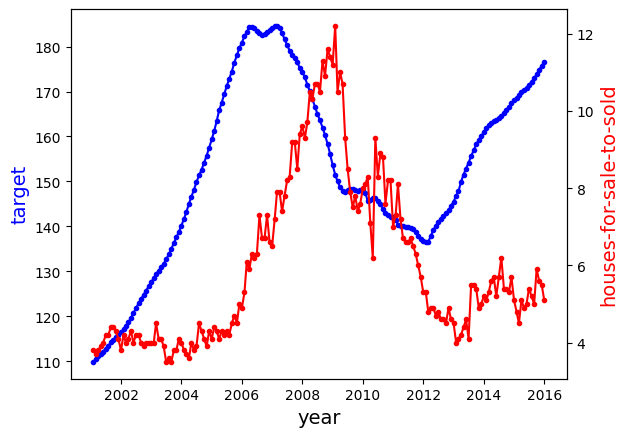

[[1.        0.3594703]
 [0.3594703 1.       ]]


In [71]:
plot_line(houdf,"target","houses-for-sale-to-sold")

matrix:

The (1, 2) and (2, 1) elements of the matrix are 0.3594703, which suggests a moderate positive correlation between the two corresponding features.

**Observation:**

The ratio of houses for sale to houses sold can be an indicator of the supply and demand dynamics in the housing market. A higher ratio could indicate a buyer’s market (more supply than demand), while a lower ratio indicate a seller’s market (more demand than supply).

From 2000 to 2020, the U.S. housing market experienced significant fluctuations due to various economic events. For instance, during the housing boom leading up to the 2008 financial crisis, both home prices (as measured by HPI) and the number of homes sold increased. However, after the crisis, there was a sharp drop in both home prices and sales

In [72]:
x = 12
houdf["houses-for-sale-to-sold_cum"] = houdf["houses-for-sale-to-sold"].rolling(window=x).sum()

houdf["house_units_completed_cum"] = houdf["house_units_completed"].rolling(window=x).sum()

houdf["retail_sales_home_furnishing_stores_cum"] = houdf["retail_sales_home_furnishing_stores"].rolling(window=x).sum()

houdf["home-ownership-rate-cum"] = houdf["home-ownership-rate"].rolling(window=x).sum()

<Axes: >

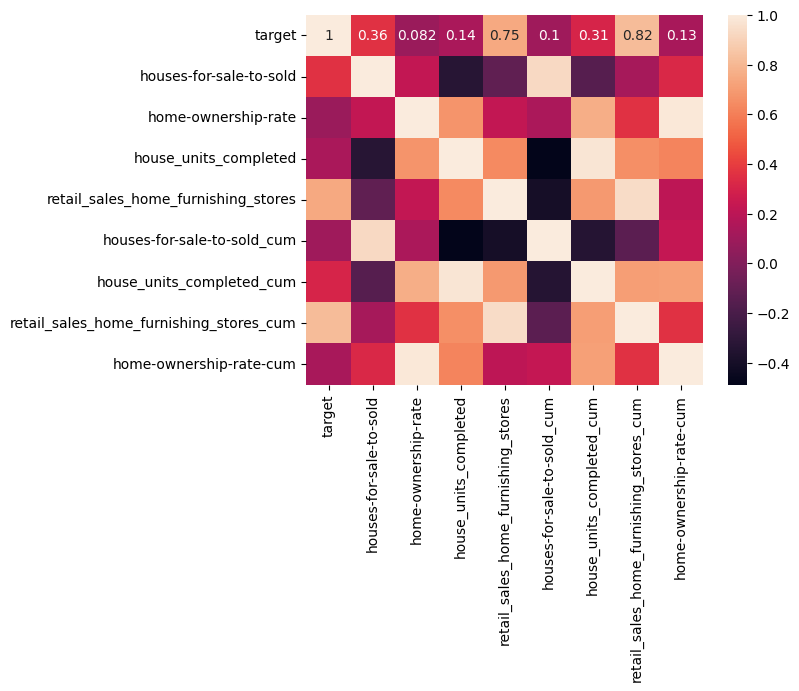

In [73]:
sns.heatmap(houdf.corr(),annot=True)

In [74]:
houdf.corr()

,target,houses-for-sale-to-sold,home-ownership-rate,house_units_completed,retail_sales_home_furnishing_stores,houses-for-sale-to-sold_cum,house_units_completed_cum,retail_sales_home_furnishing_stores_cum,home-ownership-rate-cum
target,1.000000,0.359470,0.081625,0.138613,0.747604,0.101847,0.306557,0.817026,0.130684
houses-for-sale-to-sold,0.359470,1.000000,0.225595,-0.333334,-0.116558,0.925359,-0.151497,0.123590,0.325026
home-ownership-rate,0.081625,0.225595,1.000000,0.671447,0.224654,0.141186,0.763030,0.358504,0.986856
house_units_completed,0.138613,-0.333334,0.671447,1.000000,0.634860,-0.488010,0.976211,0.654418,0.618322
retail_sales_home_furnishing_stores,0.747604,-0.116558,0.224654,0.634860,1.000000,-0.405748,0.687276,0.936328,0.207646
houses-for-sale-to-sold_cum,0.101847,0.925359,0.141186,-0.488010,-0.405748,1.000000,-0.341009,-0.133640,0.232377
house_units_completed_cum,0.306557,-0.151497,0.763030,0.976211,0.687276,-0.341009,1.000000,0.706321,0.714693
retail_sales_home_furnishing_stores_cum,0.817026,0.123590,0.358504,0.654418,0.936328,-0.133640,0.706321,1.000000,0.356970
home-ownership-rate-cum,0.130684,0.325026,0.986856,0.618322,0.207646,0.232377,0.714693,0.356970,1.000000


**observations:**

target and retail_sales_home_furnishing_stores_cum have a strong positive correlation of 0.817026. This suggests that as target increases, retail_sales_home_furnishing_stores_cum also tends to increase.

target and retail_sales_home_furnishing_stores also have a strong positive correlation of 0.747604.

home-ownership-rate and home-ownership-rate-cum have an extremely high positive correlation of 0.986856, indicating they are likely to increase or decrease together.

house_units_completed and house_units_completed_cum have a very high positive correlation of 0.976211.

houses-for-sale-to-sold and houses-for-sale-to-sold_cum have a strong positive correlation of 0.925359.

There’s a moderate negative correlation of -0.333334 between houses-for-sale-to-sold and house_units_completed, suggesting that as one increases, the other tends to decrease.

# Infrastructure and permits

nonresidential_const_val

permits

In [75]:
infdf = df.copy()
infdf = infdf[['target','permits','nonresidential_const_val']]

infdf

,target,permits,nonresidential_const_val
2001-01-31,109.845,1699,278005
2001-02-28,110.499,1656,270735
2001-03-31,111.107,1659,280450
2001-04-30,111.650,1666,278653
2001-05-31,112.162,1665,281069
...,...,...,...
2015-08-31,172.954,1165,425883
2015-09-30,173.848,1144,425801
2015-10-31,174.811,1160,419386
2015-11-30,175.755,1244,420334


In [76]:
infdf["permits_cum"] = np.log((infdf["permits"].cumsum()))
infdf["nonresidential_const_val"] = np.log(infdf["nonresidential_const_val"].cumsum())

infdf["permits_cum"] = infdf["permits"].rolling(window=12).sum()
infdf["nonresidential_const_val"] = infdf["nonresidential_const_val"].rolling(window=12).sum()

<Axes: >

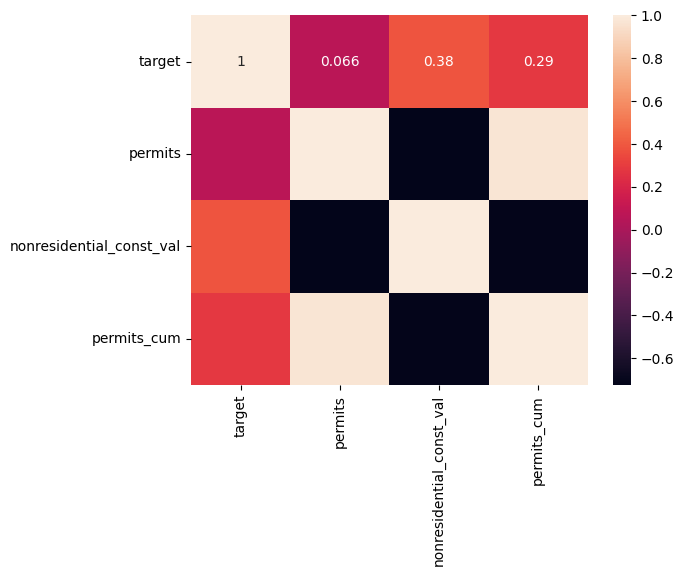

In [77]:
sns.heatmap(infdf.corr(),annot=True)

In [78]:
infdf.corr()

,target,permits,nonresidential_const_val,permits_cum
target,1.000000,0.066124,0.380202,0.285372
permits,0.066124,1.000000,-0.725018,0.971949
nonresidential_const_val,0.380202,-0.725018,1.000000,-0.717681
permits_cum,0.285372,0.971949,-0.717681,1.000000


**observations:**

target and nonresidential_const_val have a moderate positive correlation of 0.380202. This suggests that as target increases, nonresidential_const_val also tends to increase.

permits and permits_cum have a very high positive correlation of 0.971949, indicating they are likely to increase or decrease together.

There’s a strong negative correlation of -0.725018 between permits and nonresidential_const_val, suggesting that as one increases, the other tends to decrease.

Similarly, nonresidential_const_val and permits_cum have a strong negative correlation of -0.717681.

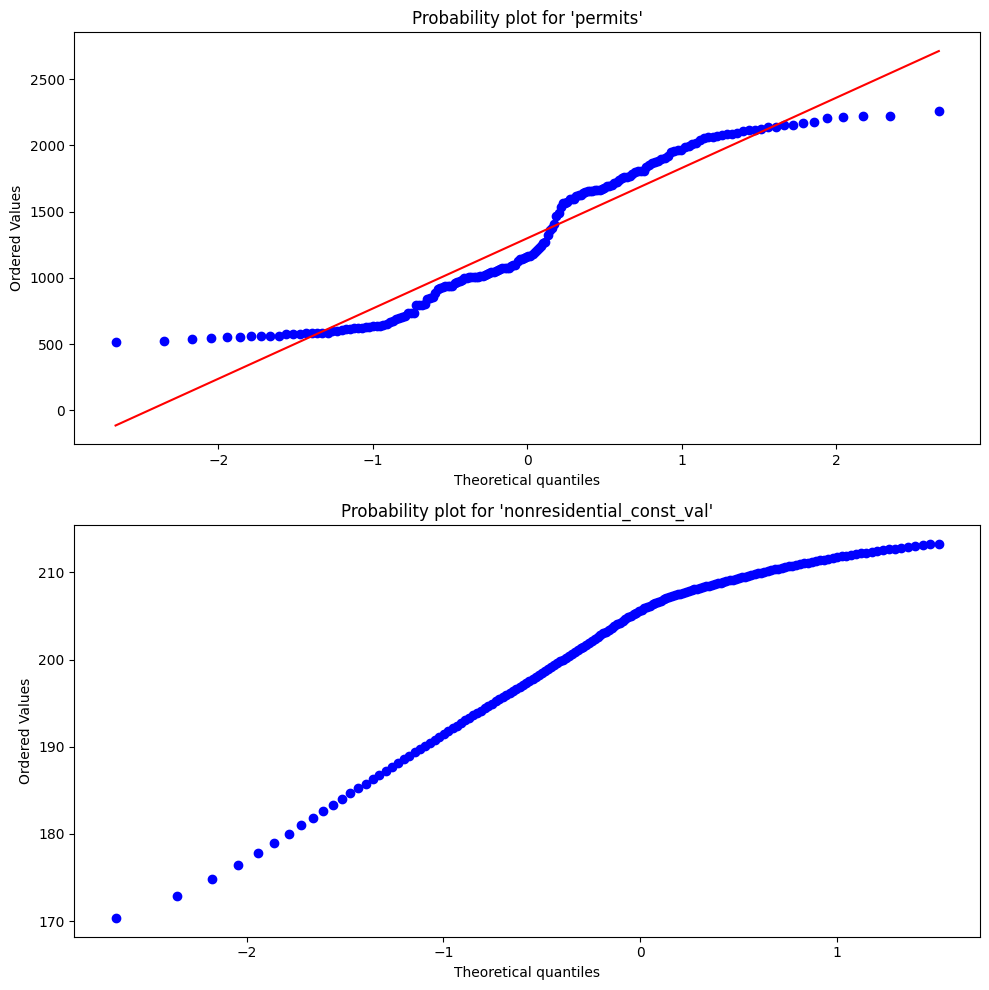

In [79]:
# Create subplots
fig, axs = plt.subplots(2, figsize=(10,10))

# Create probplot for 'permits'
stats.probplot(infdf['permits'], plot=axs[0])
axs[0].set_title("Probability plot for 'permits'")

# Create probplot for 'nonresidential_const_val'
stats.probplot(infdf['nonresidential_const_val'], plot=axs[1])
axs[1].set_title("Probability plot for 'nonresidential_const_val'")

# Show the plots
plt.tight_layout()
plt.show()

# Plotting on Line

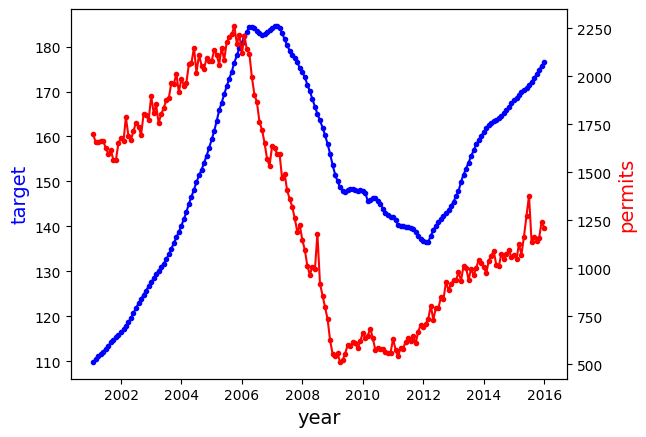

[[1.         0.06612428]
 [0.06612428 1.        ]]


In [80]:
plot_line(infdf,"target","permits")

Observation:
    
We see a strong positive correaltion with a pattern with our HPI     

# Feature Engineering and ML Model:

In [81]:
df.columns

Index(['avg_expenditure_25_34', 'avg_expenditure_35_44',
       'avg_expenditure_45_54', 'avg_expenditure_55_64', 'CPI',
       'employees_construction', 'GDP', 'HCAI_GOVT', 'HCAI_GSE', 'HCAI_PP',
       'home-ownership-rate', 'houses-for-sale-to-sold',
       'industrial_production_cement', 'private_job_gains', 'MORTGAGE30US',
       'pvt_owned_house_under_const', 'nonresidential_const_val', 'permits',
       'personal_saving_rate', 'population', 'house_units_completed',
       'producer_price_index_concrete_brick', 'residential_const_val',
       'retail_sales_home_furnishing_stores', 'target', 'UNRATE',
       'unrate_construction', 'gdp_per_capita', 'avg_expenditure_35_54'],
      dtype='object')

In [82]:
# Log transformation to remove outliers
df["unrate_construction"] = np.log(df["unrate_construction"])
df["houses-for-sale-to-sold"] = np.log(df["houses-for-sale-to-sold"])
df["MORTGAGE30US"] = np.log(df["MORTGAGE30US"])
df["CPI"] = np.log(df["CPI"])
df["private_job_gains"] = np.log(df["private_job_gains"])

In [83]:
#Since the median age is 47 lets merge this columns
df["avg_expenditure_35_54"] = df["avg_expenditure_35_44"] + df["avg_expenditure_45_54"]

# CPI

the Consumer Price Index (CPI) increased by 2.4% in 2008, 1.6% in 2009, 1.5% in 2010, 3.2% in 2011, and 2.1% in 2012 1.

The CPI is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services 2. It is used to measure inflation 2.

In [84]:
df["CPI_TREND"] = df["CPI"].apply(lambda x : "UP" if x > 0 else "DOWN")
df["CPI_TREND"].value_counts()

CPI_TREND
DOWN    178
UP        2
Name: count, dtype: int64

# GDP in last 12 months 

In [85]:
df["GDP_RATE"] = np.log(df["GDP"]/df["GDP"].shift(12))

# Growth in number of construction employees

In [86]:
df["EMP_CONST_RATE"] = np.log(df["employees_construction"]/df["employees_construction"].shift(12))

# Trend in number of employees construction

In [87]:
# Adding a categorical variable to gauge trend in number of construction employees
df["EMP_CONST_TREND"] = df["EMP_CONST_RATE"].apply(lambda x : "UP" if x > 0 else "DOWN")

In [88]:
# Since HCAI_GOVT, HCAI_GSE AND HCAI_PP are highly collinear with each other, we are linearly combining them 
df["HCAI"] = (df["HCAI_GOVT"] + df["HCAI_GSE"] + df["HCAI_PP"])/3

# Rate of change of houses for sale to sold - house supply

In [89]:
df["houses-for-sale-to-sold-rate"] = np.log(df["houses-for-sale-to-sold"]/df["houses-for-sale-to-sold"].shift(12))

# Trend in house supply

In [90]:
df["HOUSES_S2S_TREND"] = df["houses-for-sale-to-sold-rate"].apply(lambda x : "UP" if x > 0 else "DOWN")

# Vizualizng

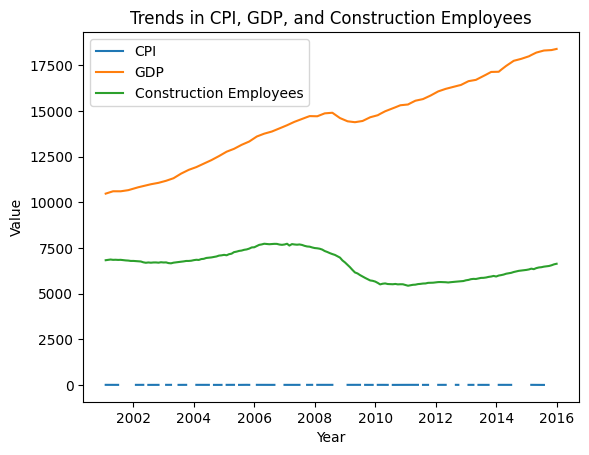

In [91]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the CPI trend
ax.plot(df.index, df["CPI"], label="CPI")

# Plot the GDP trend
ax.plot(df.index, df["GDP"], label="GDP")

# Plot the number of construction employees trend
ax.plot(df.index, df["employees_construction"], label="Construction Employees")

# Set the title and axis labels
ax.set_title("Trends in CPI, GDP, and Construction Employees")
ax.set_xlabel("Year")
ax.set_ylabel("Value")

# Add a legend
ax.legend()

# Show the plot
plt.show()


# Analyzing correlation with derivates of features

In [92]:
for column in df.columns:
    try:
        temp_rate = np.log(df[column]/df[column].shift(12)).dropna()
        temp_cum = df[column].cumsum()
        
        temp_rate_cum = np.log(temp_cum/temp_cum.shift(12)).dropna()
        print()
        print(column,round(df.corr()["target"][column],2))
        trate12 = np.corrcoef(df["target"][12:],temp_rate)[0,1]
        print(f"Correlation between target variable and 12 months change of rate {round(trate12,2)}")
        
        tcum = (np.corrcoef(df["target"],temp_cum)[0,1])
        print(f"correlation cumulative {round(tcum,2) }")
        
        tcumrate = np.corrcoef(df["target"][12:],temp_rate_cum)[0,1]
        print(f"correlation cumulative rate {round(tcumrate,2) }")
        

        
    except:
        continue


# Adding cumulative sum and rate of change

industrial_production_cement

CPI

houses_for_sale_to_sold

pvt_owned_house_under_const

house_units_completed

In [93]:
df["industrial_production_cement_cum"] = df["industrial_production_cement"].cumsum()
df["cpi_cum"] = df["CPI"].cumsum()

df["houses_for_sale_to_sold_cum"] = df["houses-for-sale-to-sold"].cumsum()
df["private_job_gains_cum"] = df["private_job_gains"].cumsum()
df["pvt_owned_house_under_const_cum"] = df["pvt_owned_house_under_const"].cumsum()
 
df["permits_cum"] = df["permits"].cumsum()

df["house_units_completed_cum"] = df["house_units_completed"].cumsum()

 


## Rate of change of industrial_production_cement_cum
df["industrial_production_cement_rate"] = np.log(df["industrial_production_cement_cum"]/df["industrial_production_cement_cum"].shift(12))

df["pvt_owned_house_under_const_rate"] = np.log(df["pvt_owned_house_under_const_cum"]/df["pvt_owned_house_under_const_cum"].shift(12))

df["permits_rate"] = np.log(df["permits_cum"]/df["permits_cum"].shift(12))

df["private_job_gains_rate"] = np.log(df["private_job_gains_cum"]/df["private_job_gains_cum"].shift(12))


df["pvt_owned_house_under_const_rate"] = np.log(df["pvt_owned_house_under_const_cum"]/df["pvt_owned_house_under_const_cum"].shift(12))


df["house_units_completed_rate"] = np.log(df["house_units_completed_cum"]/df["house_units_completed_cum"].shift(12))


df["private_job_gains_rate"] = np.log(df["private_job_gains_cum"]/df["private_job_gains_cum"].shift(12))


df["private_job_gains_rate"] = np.log(df["private_job_gains_cum"]/df["private_job_gains_cum"].shift(12))

# Adding features to gauge trend


In [94]:
df["PERMITS_TREND"] =  df["permits_rate"].apply(lambda x : "UP" if x > 0 else "DOWN")
df["private_job_gains_trend"] =  df["private_job_gains_rate"].apply(lambda x : "UP" if x > 0 else "DOWN")
df["pvt_owned_house_under_const_trend"] =  df["pvt_owned_house_under_const_rate"].apply(lambda x : "UP" if x > 0 else "DOWN")

df["house_units_completed_trend"] =  df["house_units_completed_rate"].apply(lambda x : "UP" if x > 0 else "DOWN")

In [95]:
train = final_df[:"2015"]
test = final_df["2016":]

trainx = train.loc[:,train.columns!="target"]
trainy = train["target"]

testx = test.loc[:,test.columns!="target"]
testy = test["target"]

X = trainx.copy()
y = trainy.copy()

<Axes: >

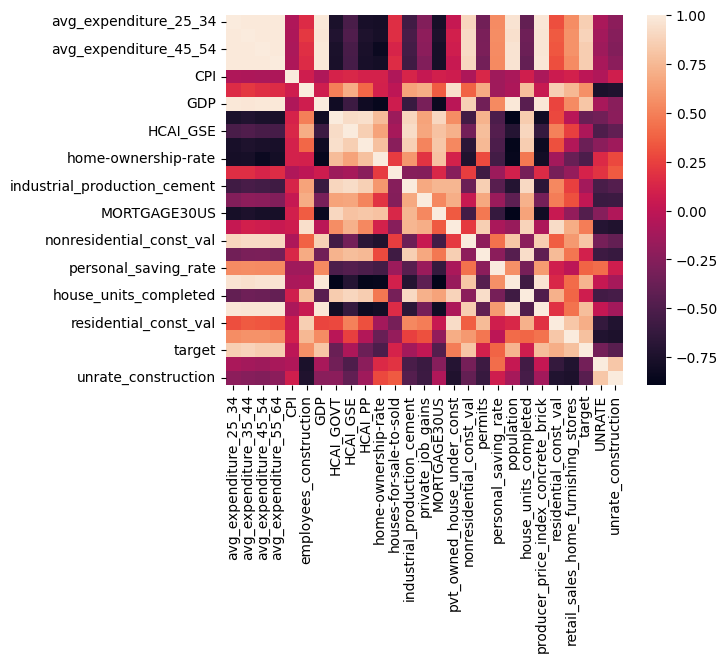

In [96]:
sns.heatmap(final_df.corr())

In [97]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [98]:
testx = scaler.transform(testx)

In [99]:
#Initializing lassoCV instance
reg = LassoCV()
# Fitting the instance
reg.fit(X, y)
print(f"Best alpha using built-in LassoCV: {round(reg.alpha_,5)}")

print(f"Best score using built-in LassoCV:{round(reg.score(testx,testy),4)}")

coef = pd.Series(reg.coef_, index = trainx.columns)

Best alpha using built-in LassoCV: 0.01513
Best score using built-in LassoCV:0.8545


In [100]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 20 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

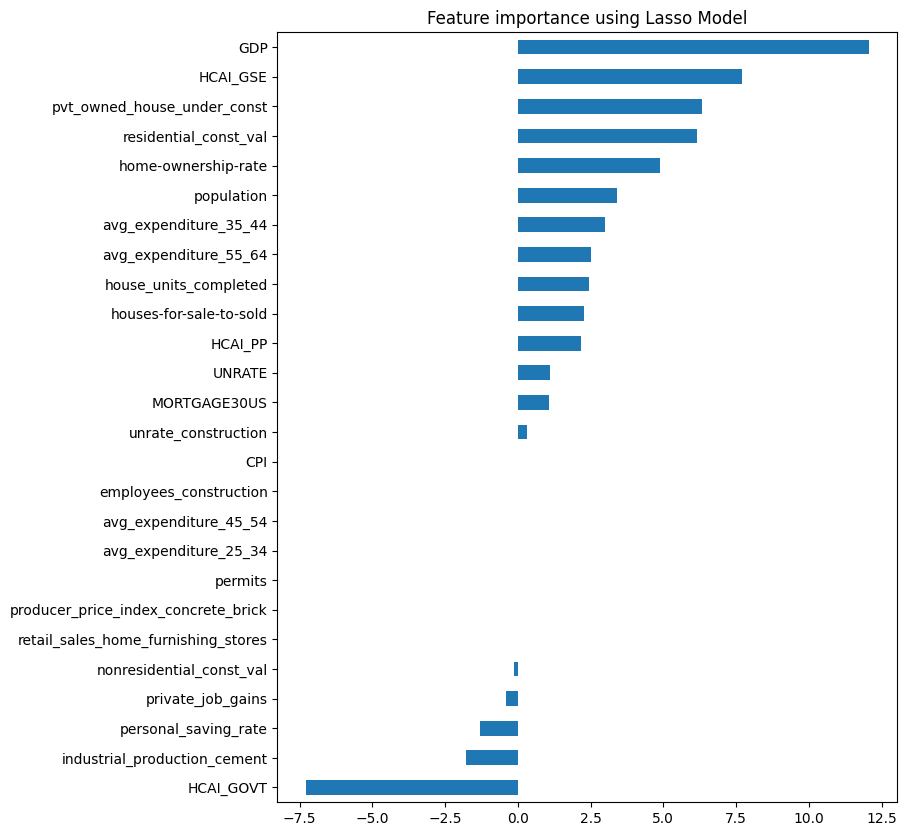

In [101]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#plt.savefig("./images/featimp.png")

In [102]:
coef[coef==0]

avg_expenditure_25_34                  0.0
avg_expenditure_45_54                  0.0
employees_construction                 0.0
permits                               -0.0
producer_price_index_concrete_brick   -0.0
retail_sales_home_furnishing_stores    0.0
dtype: float64

In [103]:
((coef[coef!=0]).sort_values(ascending=False))

GDP                             12.075185
HCAI_GSE                         7.706475
pvt_owned_house_under_const      6.341874
residential_const_val            6.162704
home-ownership-rate              4.880871
population                       3.422725
avg_expenditure_35_44            2.999229
avg_expenditure_55_64            2.511573
house_units_completed            2.455733
houses-for-sale-to-sold          2.285356
HCAI_PP                          2.161994
UNRATE                           1.102002
MORTGAGE30US                     1.078478
unrate_construction              0.316277
CPI                              0.001646
nonresidential_const_val        -0.125194
private_job_gains               -0.393354
personal_saving_rate            -1.296604
industrial_production_cement    -1.797413
HCAI_GOVT                       -7.289179
dtype: float64

In [104]:
mse = mean_squared_error(reg.predict(testx),testy)
print(f" MSE = {mse}")
print(f"RMSE = {mse**0.5}")
print(f" R2  = {round(reg.score(testx,testy),4)}")

 MSE = 31.784404725497534
RMSE = 5.637765933904807
 R2  = 0.8545


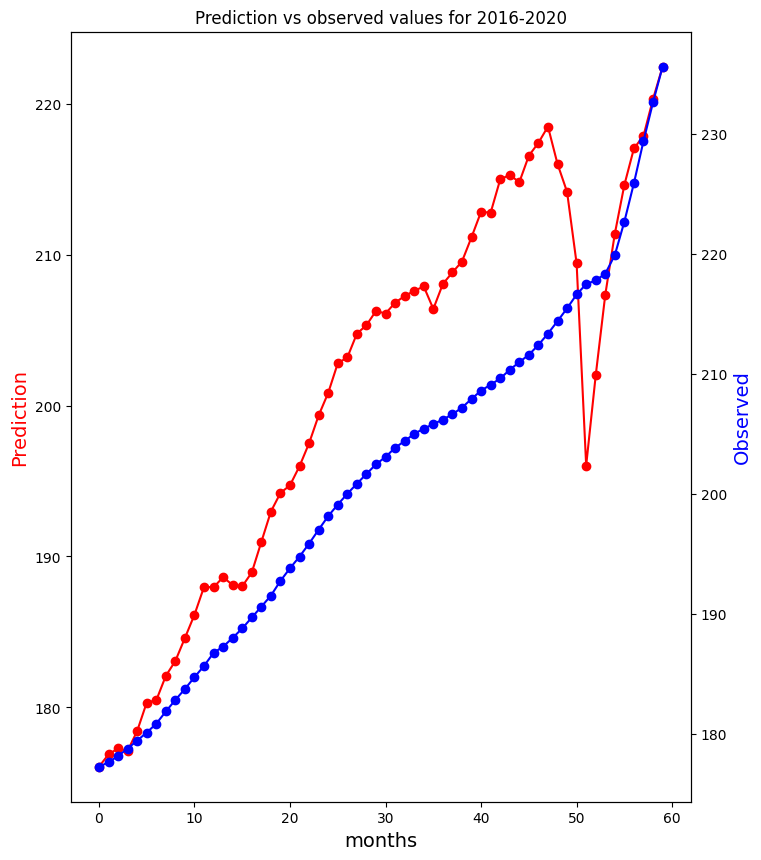

In [105]:
fig,ax = plt.subplots()
# make a plot
ax.plot(range(60), reg.predict(testx), color="red", marker="o")
# set x-axis label
ax.set_xlabel("months",fontsize=14)
# set y-axis label
ax.set_ylabel("Prediction",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(60),testy,color="blue",marker="o")
ax2.set_ylabel("Observed",color="blue",fontsize=14)
plt.title(label = "Prediction vs observed values for 2016-2020")
plt.show()

R2 Score using Linear Regression: 0.828
Coefficients:  [-4.23901723  1.70688975  1.77035444  4.36603685  0.05390194  5.89673422
 17.0794561  -9.55397143  9.36045819  1.73360572  4.95212468  1.46209037
 -2.31090054 -0.21924272  1.22866982  3.14117341 -0.27842377 -2.43817582
 -1.00484542  3.94671847  2.92126405 -5.25696312  7.93094935 -1.55942336
  2.79086654  0.39275352]
MSE = 37.583423200927605
RMSE = 6.130532048764414
R2  = 0.828


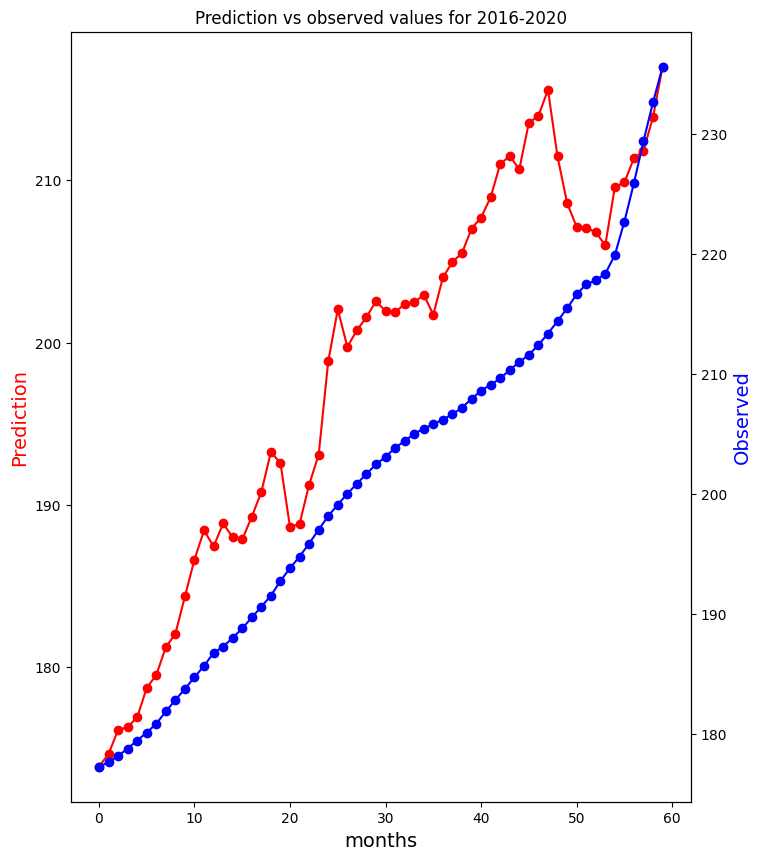

In [106]:
from sklearn.linear_model import LinearRegression

# Initializing LinearRegression instance
reg = LinearRegression()

# Fitting the instance
reg.fit(X, y)

# Print R2 score and coefficients
print(f"R2 Score using Linear Regression: {round(reg.score(testx, testy), 4)}")
print("Coefficients: ", reg.coef_)

mse = mean_squared_error(reg.predict(testx), testy)
print(f"MSE = {mse}")
print(f"RMSE = {mse**0.5}")
print(f"R2  = {round(reg.score(testx, testy), 4)}")

fig, ax = plt.subplots()
# make a plot
ax.plot(range(60), reg.predict(testx), color="red", marker="o")
# set x-axis label
ax.set_xlabel("months", fontsize=14)
# set y-axis label
ax.set_ylabel("Prediction", color="red", fontsize=14)

# twin object for two different y-axis on the same plot
ax2 = ax.twinx()
# make a plot with different y-axis using the second axis object
ax2.plot(range(60), testy, color="blue", marker="o")
ax2.set_ylabel("Observed", color="blue", fontsize=14)
plt.title(label="Prediction vs observed values for 2016-2020")
plt.show()



**Observations:**

R2 Score Comparison:

Linear Regression: R2 Score of 0.828
Lasso Regression: R2 Score of 0.8545
The R2 score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). A higher R2 score indicates that the model explains more variance in the target variable. In this case, Lasso Regression outperforms Linear Regression in explaining the variance in the dataset.

Coefficient Analysis:

Linear Regression Coefficients: [-4.24, 1.71, 1.77, 4.37, 0.05, 5.90, ...]
Lasso Regression Coefficients: [-1.00, 3.95, 2.92, -5.26, 7.93, -1.56, ...]
The coefficients represent the importance or contribution of each feature to the prediction. Lasso Regression applies L1 regularization, which encourages some feature coefficients to become exactly zero, effectively performing feature selection. This can lead to a simpler and more interpretable model with a smaller subset of relevant features.

MSE (Mean Squared Error) Comparison:

Linear Regression: MSE of 37.5834
Lasso Regression: MSE of 31.7844
MSE measures the average squared difference between predicted and actual values. A lower MSE indicates a better fit of the model to the data. In this comparison, Lasso Regression achieved a lower MSE, suggesting that it provides a better fit to the dataset.

RMSE (Root Mean Squared Error) Comparison:

Linear Regression: RMSE of 6.1305
Lasso Regression: RMSE of 5.6378
RMSE is the square root of the MSE and represents the average absolute error between predicted and actual values. Lasso Regression again performs better with a lower RMSE, indicating improved accuracy in its predictions.

Conclusion:

In this research, we compared Linear Regression and Lasso Regression for a regression task. Lasso Regression demonstrated superior performance in terms of R2 score, MSE, and RMSE. It not only explained a higher proportion of the variance in the target variable but also achieved better accuracy and reduced prediction errors. Furthermore, Lasso Regression's feature selection capability resulted in a simpler model with a reduced set of influential features. These findings suggest that Lasso Regression is a preferred choice when dealing with regression tasks involving complex datasets with potentially redundant or irrelevant features, as it can lead to improved predictive power and model interpretability.




